In [1]:
'''
TODO: 
    MOVER EL BUSCAR CENTROIDES EXACTOS DE LA FUNCION DE PLOTEAR A LA FUNCION DE CREAR CLUSTERS. 
        -HACER UNA LISTA CON LOS CENTROIDES EXACTOS DE LOS CLUSTERS, Y LOS CENTROIDES EN LAS POSICIONES EXISTENTES 
    Reiniciar el kernel y ejecutar funciones para saber si esta tomando los valores de las variables de fuera de las funciones
    Quitar warning #para quitar el warning, pero truena el plot(del C1 sigue el C10)
    
    - cambiar de grupos a series de tiempo

-un bug que hace que el subcentroide del grupo 11 sea el del 10 y viceversa en la grafica despues de filtrado basico

'''
'''
OTRAS NOTAS:

    Referente a pandas y a leer archivos de excel:
        Since December 2020 xlrd no longer supports xlsx-Files as explained in the official (https://stackoverflow.com/questions/48066517/python-pandas-pd-read-excel-giving-importerror-install-xlrd-0-9-0-for-excel)
'''


'\nOTRAS NOTAS:\n\n    Referente a pandas y a leer archivos de excel:\n        Since December 2020 xlrd no longer supports xlsx-Files as explained in the official (https://stackoverflow.com/questions/48066517/python-pandas-pd-read-excel-giving-importerror-install-xlrd-0-9-0-for-excel)\n'

# 0. Imports

In [120]:
#%matplotlib tk #popup
%matplotlib notebook
# para hacer el grafico animado
#%matplotlib notebook
#importa las fuciones que cree desde otro notebook (instalar modulo ipynb)
import ipynb.fs.defs.my_funcs_clusters as myfunc

import os
import warnings
import datetime
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

from sklearn import cluster, datasets

from itertools import cycle
from cycler import cycler
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn import mixture
from scipy import spatial
from scipy import optimize
from sklearn.neighbors import KDTree
import sklearn as sk
from scipy.spatial.distance import cdist

import matplotlib.dates as mdates
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter
import matplotlib.patheffects as path_effects #efectos de texto
from matplotlib import rc, font_manager
import matplotlib.lines as mlines# para crear las leyendas manuales (markers)

import seaborn as sns
sns.set()
plt.style.use('seaborn-white')
sns.set_style("whitegrid")
#mpl.use('TkAgg')#popup


from matplotlib.widgets import RadioButtons, TextBox
from IPython.display import display as wgdisplay
import ipywidgets as widgets
from ipywidgets import Layout
from ipywidgets import interact, interactive, fixed, interact_manual


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# fecha en espanol
import locale
locale.setlocale(locale.LC_ALL, "")
##### ANIMACION #####
import matplotlib.animation as manimation
#ubicacion de ffmpeg.exe
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\mungu\\Anaconda3\\Library\\bin\\ffmpeg.exe'
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\ernesto\\Anaconda3\\pkgs\\ffmpeg-4.3.1-ha925a31_0\\Library\\bin\\ffmpeg.exe'

#FFMpegWriter = manimation.writers['ffmpeg']

plt.rcParams.update({'figure.max_open_warning': 0})

In [138]:
import importlib
importlib.reload(myfunc)

<module 'ipynb.fs.defs.my_funcs_clusters' (C:\Users\mungu\Documents\GitHub\aero\my_funcs_clusters.ipynb)>

# carga y procesamiento de datos

In [122]:
lsPath = 'C:/Users/mungu/Documents/DatosWTG.xlsx'
xlsPathMfgCurve = 'C:/Users/mungu/Dropbox/Doctorado/Python/aero/Curva de potencia vestas 90.xlsx'
dataVDP,dfVecVel,dfMfgCurve = myfunc.raw_to_datafr(lsPath,xlsPathMfgCurve)
dataVP = dataVDP.drop('Dir',axis=1)

Total de registros: 52848
Numero de filas sin datos
vViento    312
Pacw       312
dtype: int64


## INICIALIZACION

In [123]:
#JCP minimun 300 or 500 dpi, TIFF, EPS,PDF, JPG o MS office
MY_DPI = 120 #ACTUAL SCREEN DPI

FIGURE_DPI = 300 # WANTED FIGURE DPI
FIG_WIDTH_IN_PIXELS = 1600/FIGURE_DPI
FIG_HEIGHT_IN_PIXELS = 700/FIGURE_DPI

#For formats not supported by matplotlib, install pillow
FIGURE_FORMAT='jpg'

flagsaveim =False #flag para indicar si se guardan las imagenes (no quiero que se sobreescriban)

# 

In [6]:
dataVP_pu=dataVP.copy()
dataVP_pu.Pw= dataVP.Pw.apply(lambda x : x/dataVP.Pw.max())


In [7]:
dataVP_pu.Pw.head()

PCTimeStamp
2016-01-01 00:00:00    0.902941
2016-01-01 00:10:00    0.955882
2016-01-01 00:20:00    0.947059
2016-01-01 00:30:00    0.961765
2016-01-01 00:40:00    0.958824
Name: Pw, dtype: float64

In [8]:
dataVP.head()

,vViento,Pw
PCTimeStamp,,
2016-01-01 00:00:00,12.7,1.953050e+06
2016-01-01 00:10:00,14.8,2.067561e+06
2016-01-01 00:20:00,16.2,2.048475e+06
2016-01-01 00:30:00,14.9,2.080284e+06
2016-01-01 00:40:00,16.2,2.073922e+06


# Análisis básico

##  Curva de potencia del fabricante y nube de puntos

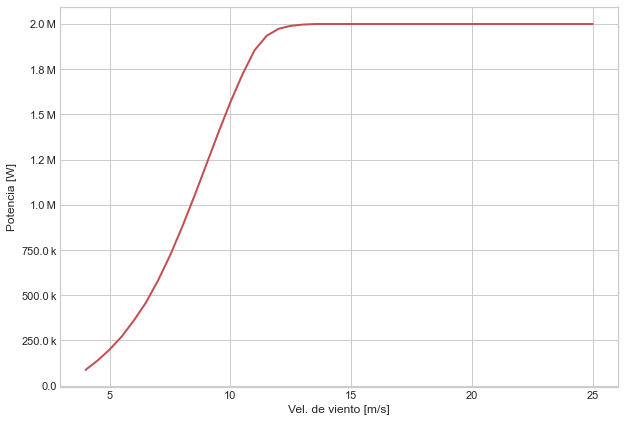

In [9]:
%matplotlib inline
fwidth = 10
fheigth = 7
plt.figure(100,figsize=(fwidth,fheigth))
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,linewidth=2,c='r')
ax1=  plt.gca()
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
ax1.set_ylabel('Potencia [W]')
ax1.set_xlabel('Vel. de viento [m/s]')
ax1.yaxis.set_major_formatter(formatter1)
plt.plot()

if flagsaveim:
    plt.savefig('reporte/figuras/curvpfab.png')



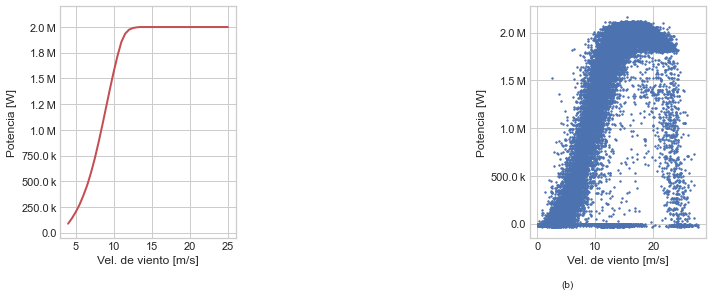

In [10]:
%matplotlib inline
fwidth = 10
fheigth = 7
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
plt.figure(101,figsize=(fwidth,4))
plt.subplot(121)
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,linewidth=2,c='r')
ax1=  plt.gca()
ax1.set_ylabel('Potencia [W]')
ax1.set_xlabel('Vel. de viento [m/s]')
ax1.yaxis.set_major_formatter(formatter1)
plt.ylim([-50e3,2.2e6])
ax1.annotate('(b)',xy=(0.78,0.01),xycoords='figure fraction'  )

plt.subplot(122)
plt.scatter(dataVP.vViento,dataVP.Pw,s=2)
ax2=  plt.gca()
ax2.set_ylabel('Potencia [W]')
ax2.set_xlabel('Vel. de viento [m/s]')
ax2.yaxis.set_major_formatter(formatter1)
plt.tight_layout()

if flagsaveim:
    plt.savefig('reporte/figuras/crvFabReal.png')




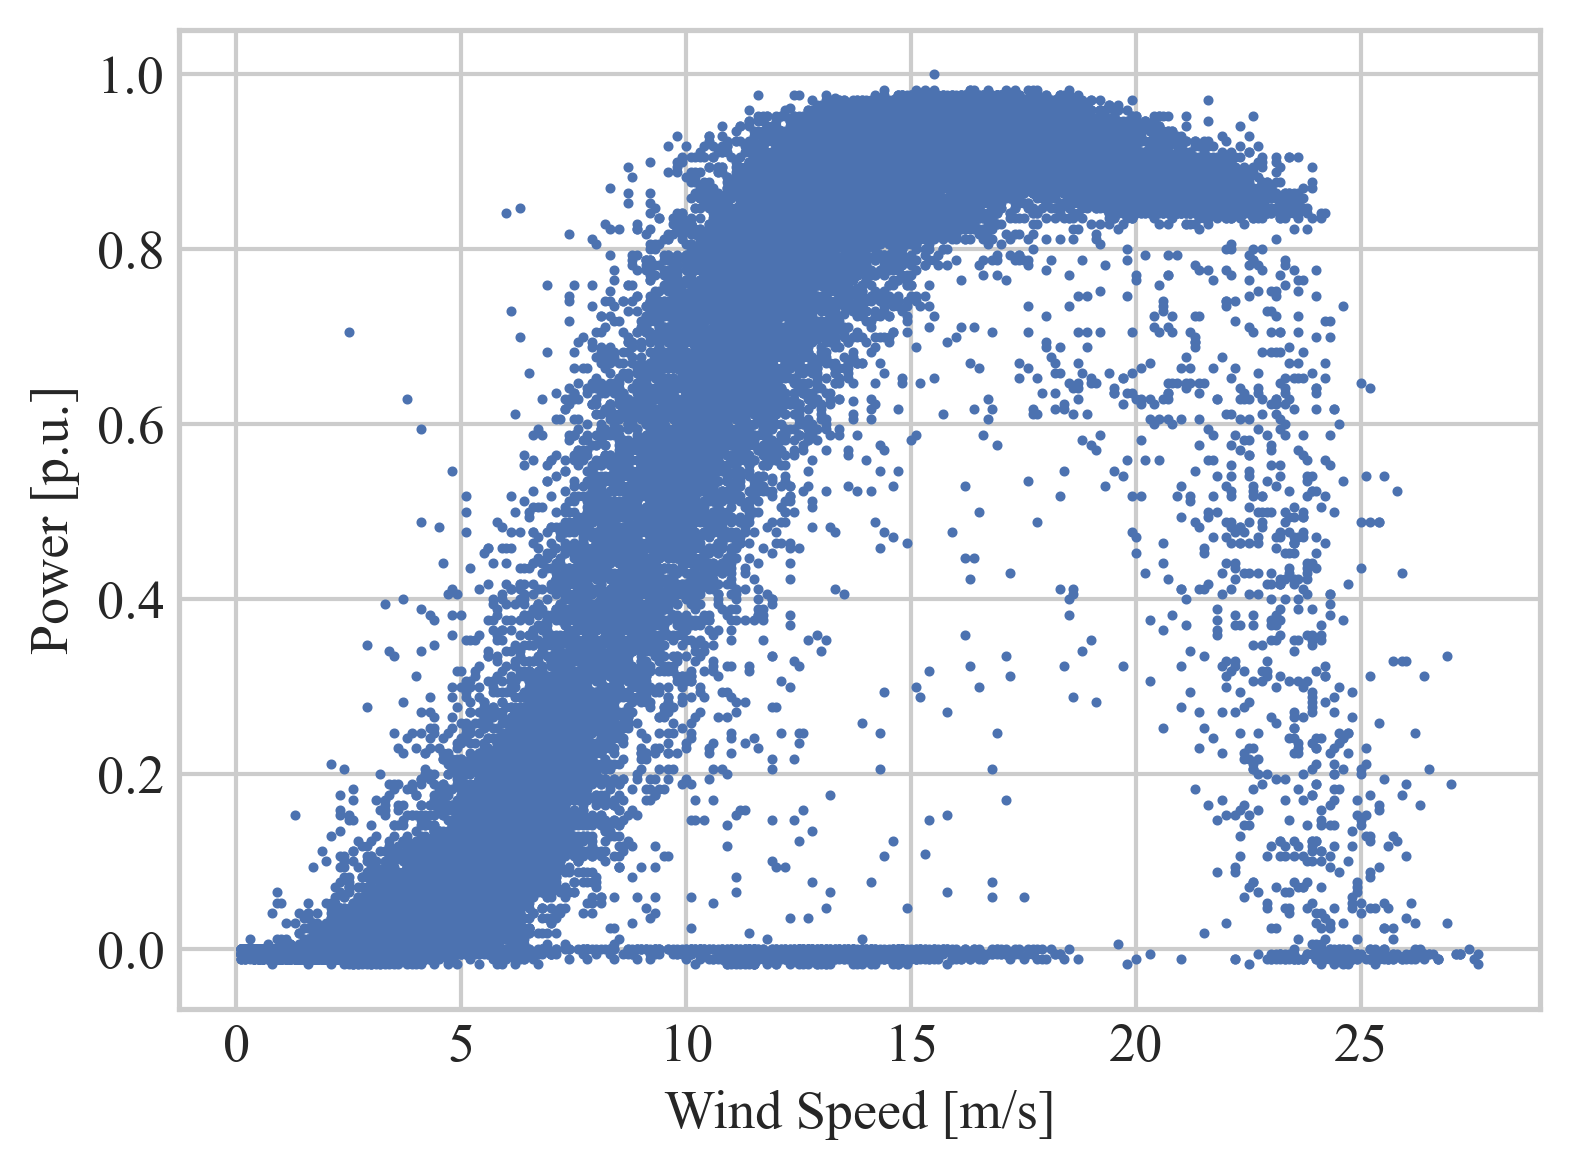

In [11]:
fontsize = 13
labelFontSize = 13
tickFontSize = 12
markerSize = 100
fontNameLabel = {'fontname':'Times New Roman'}
fontNameCluster = {'fontname':'Arial'}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=labelFontSize, weight='normal', stretch='normal')   

# nube de puntos dividida entre max pot
#width = 8
#heigth = 11
#formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
extraHeigth = 500/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 0
plt.figure(102,figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)

plt.scatter(dataVP.vViento,dataVP.Pw/dataVP.Pw.max(),s=2)
ax=  plt.gca()
ax.set_ylabel('Power [p.u.]',fontsize=13,**fontNameLabel)
ax.set_xlabel('Wind Speed [m/s]',fontsize=13,**fontNameLabel)
#ax.yaxis.set_major_formatter(formatter1)

for label in plt.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
for label in plt.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)
plt.tight_layout()

if flagsaveim:
    plt.savefig('fig_art/crvNubePts.png')
tmpFigFilename = 'fig_art/curv_pot_real'+'.'+'jpg'
plt.savefig(tmpFigFilename)


In [12]:
dataVP.vViento/dataVP.vViento.max()

PCTimeStamp
2016-01-01 00:00:00    0.460145
2016-01-01 00:10:00    0.536232
2016-01-01 00:20:00    0.586957
2016-01-01 00:30:00    0.539855
2016-01-01 00:40:00    0.586957
                         ...   
2017-01-01 23:00:00    0.028986
2017-01-01 23:10:00    0.036232
2017-01-01 23:20:00    0.043478
2017-01-01 23:30:00    0.039855
2017-01-01 23:40:00    0.021739
Name: vViento, Length: 52530, dtype: float64

##  Histograma

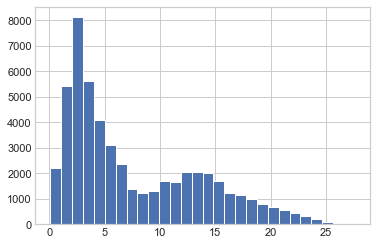

In [13]:
#histograma de velocidades
bins = int(np.around(dataVP.vViento.max()))
plt.figure()
plt.hist(dataVP.vViento,bins=bins)
plt.show()


## Histograma 3D

Bbox(x0=0.125, y0=0.125, x1=0.4068181818181818, y1=0.88)


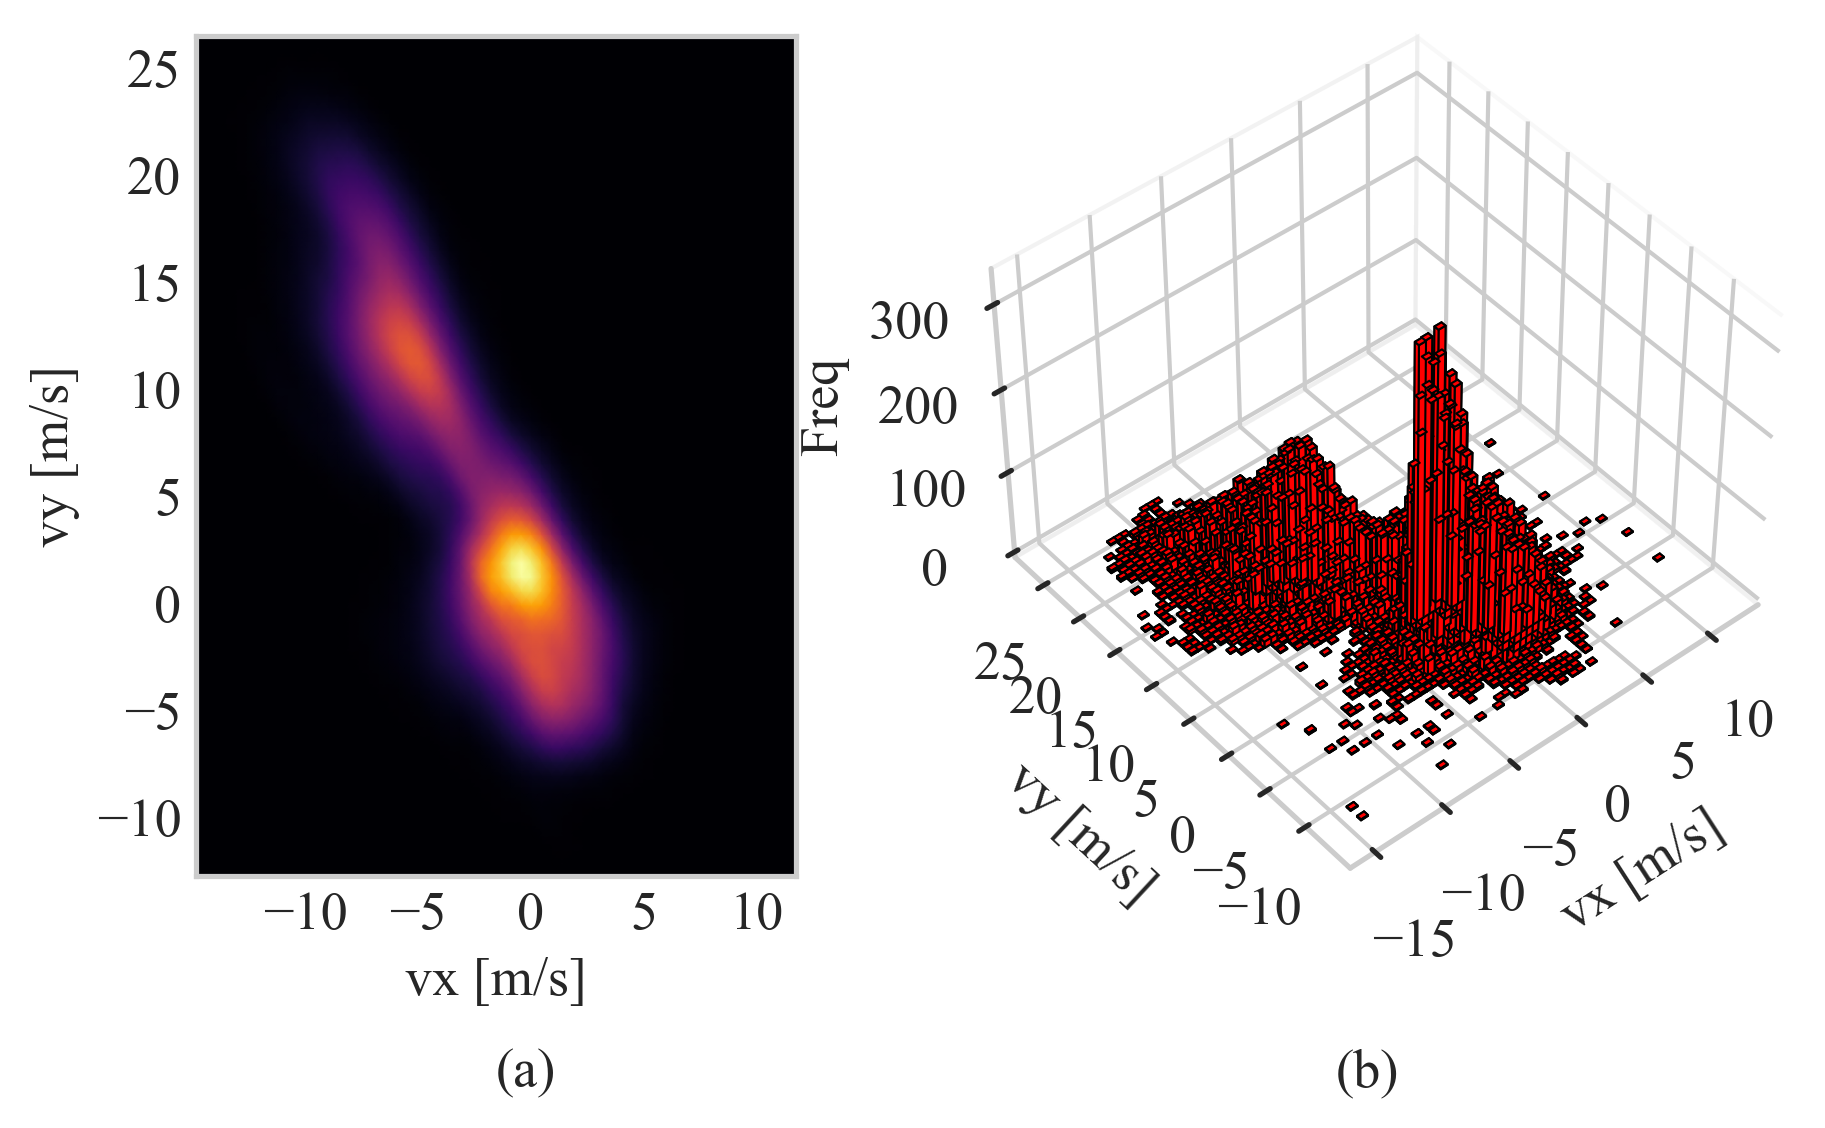

In [14]:
#en esta celda se usa gridspec para cambiar el tamaño de subplots individuales
%matplotlib inline
from scipy.stats import kde

pltfstitle =10 #tamaño de fuente
pltfslbl =13
nbins =60

H, xedges, yedges = np.histogram2d(dfVecVel.vx.values, dfVecVel.vy.values,bins=nbins )
H=H.T;
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#

x_data, y_data = np.meshgrid( xedges[:-1],yedges[:-1])
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = H.flatten()

# Create a figure for plotting the data as a 3D histogram.
extraHeigth = 700 /FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 400 / FIGURE_DPI
fig =plt.figure(figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)


# eliminar elementos con frecuencia zero
a = z_data[z_data != 0]
idx=np.where(z_data == 0)[0]
b=np.delete(x_data,idx)
c=np.delete(y_data,idx)
z_data=a
x_data=b
y_data=c

# tres graficas
#cmap del histograma2d. Es un array de nx 4 elementos (rgba)
#histograma 3d
#ax = fig.add_subplot(121, projection='3d')
#grid = plt.GridSpec(2,2, wspace=0.3, hspace=0.1)
#axScatter=fig.add_subplot(grid[0, 0])
#axDensity= fig.add_subplot(grid[0, 1])
#axHist2d =fig.add_subplot(grid[1,0: ], projection='3d')

# dos graficas
#cmap del histograma2d. Es un array de nx 4 elementos (rgba)
#histograma 3d
#ax = fig.add_subplot(121, projection='3d')

grid = plt.GridSpec(1, 2,width_ratios=[1,1.5])
#axScatter=fig.add_subplot(grid[0, 0])

axDensity= fig.add_subplot(grid[0, 0])
axHist2d =fig.add_subplot(grid[0,1 ], projection='3d')

# axDensity = plt.subplot2grid(shape=(1, 3), loc=(0, 0), colspan=1)
# axHist2d = plt.subplot2grid(shape=(1, 3), loc=(0, 1), colspan=2, projection='3d')


#SCATTER
#axScatter.scatter(dfVecVel.vx,dfVecVel.vy,s=0.6)
#axScatter.set_ylabel('vy [m/s]', fontsize = pltfslbl) 
#axScatter.set_xlabel('vx [m/s]', fontsize = pltfslbl) 
##axScatter.set_aspect('equal')
#axScatter.set_xticks(np.arange(np.around(dfVecVel.vx.min()),dfVecVel.vx.max(),5))

#DENSITY PLOT
data = np.array(dfVecVel.values.tolist())
x, y = data.T
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axDensity.set_ylabel('vy [m/s]', fontsize = pltfslbl,fontname='Times New Roman') 
axDensity.set_xlabel('vx [m/s]', fontsize = pltfslbl,fontname='Times New Roman') 
axDensity.tick_params(axis='both', labelsize = pltfslbl)
axDensity.set_aspect('auto')
axDensity.set_xticks(np.arange(np.around(dfVecVel.vx.min()),dfVecVel.vx.max(),5))
axDensity.set_yticks(np.arange(-10,dfVecVel.vy.max(),5))



#guardo el objeto pcolormesh para obtener su cmap
axDensity.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.inferno)

#HIST2D

axHist2d.tick_params(axis='both', labelsize = pltfslbl)
ancho_barra =0.5
largo_barra = 0.5
axHist2d.bar3d( x_data,
          y_data,
          np.zeros_like(z_data),
          ancho_barra, largo_barra, z_data, shade=False,
         color = 'red',edgecolors='black', linewidth=0.5)
axHist2d.xaxis.pane.fill = False
axHist2d.yaxis.pane.fill = False
axHist2d.zaxis.pane.fill = False
#axHist2d.set_aspect('auto')

#Vista del histograma 3d
axHist2d.view_init(45,-130)
axHist2d.set_ylabel('vy [m/s]', fontsize = pltfslbl,fontname='Times New Roman') 
axHist2d.set_xlabel('vx [m/s]', fontsize = pltfslbl,fontname='Times New Roman') 
axHist2d.set_zlabel('Freq', fontsize = pltfslbl, rotation= 90,fontname='Times New Roman') 
axHist2d.set_xticks(np.arange(round(min(x_data)), max(x_data)+1, 5))
axHist2d.set_yticks(np.arange(-10, 30, 5))


for label in axDensity.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axDensity.get_yticklabels():
    label.set_fontproperties(ticks_font)        
    
for label in axHist2d.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axHist2d.get_yticklabels():
    label.set_fontproperties(ticks_font)        
for label in axHist2d.get_zticklabels():
    label.set_fontproperties(ticks_font)

print(axDensity.get_position())
axDensity.set_position(mtransforms.Bbox.from_bounds(0.1,0.2,0.3,0.6))
#plt.tight_layout(w_pad=15)

#figure caption
axDensity.text(0.25,.05,'(a)',transform=fig.transSubfigure,fontsize= pltfslbl,fontname='Times New Roman')
axDensity.text(0.67,.05,'(b)',transform=fig.transSubfigure,fontsize= pltfslbl,fontname='Times New Roman')

# if flagsaveim:
#     figsavetime = datetime.datetime.now().strftime("%d-%m-%Y_%H_%M_%S_%f")
#     #plt.savefig('fig_art/scatter_pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)
#     plt.savefig('fig_art/pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)
# figsavetime = datetime.datetime.now().strftime("%d-%m-%Y_%H_%M_%S_%f")
# plt.savefig('fig_art/pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)
tmpFigFilename = 'fig_art/pdf_hist2d'+'.'+ FIGURE_FORMAT
plt.savefig(tmpFigFilename)

plt.show()



In [15]:
min(dfVecVel.vy)

-12.782189190468658

In [16]:
axDensity.bbox.transformed(fig.gca().transAxes).height

710181.818181818

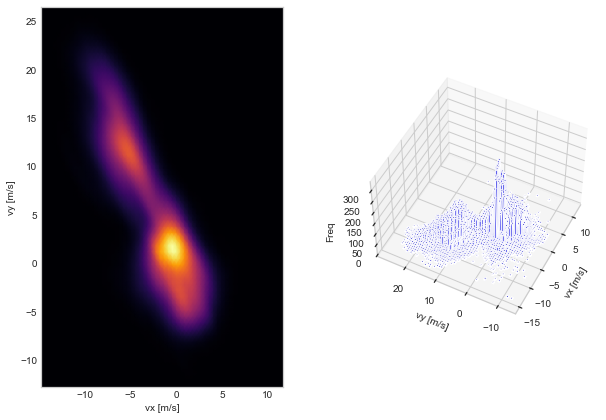

In [17]:
%matplotlib inline
from scipy.stats import kde

pltfstitle =10 #tamaño de fuente
pltfslbl =10
nbins =60

H, xedges, yedges = np.histogram2d(dfVecVel.vx.values, dfVecVel.vy.values,bins=nbins )
H=H.T;
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#

x_data, y_data = np.meshgrid( xedges[:-1],yedges[:-1])
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = H.flatten()

# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure(figsize=(10,7))

# eliminar elementos con frecuencia zero
a = z_data[z_data != 0]
idx=np.where(z_data == 0)[0]
b=np.delete(x_data,idx)
c=np.delete(y_data,idx)
z_data=a
x_data=b
y_data=c

# tres graficas
#cmap del histograma2d. Es un array de nx 4 elementos (rgba)
#histograma 3d
#ax = fig.add_subplot(121, projection='3d')
#grid = plt.GridSpec(2,2, wspace=0.3, hspace=0.1)
#axScatter=fig.add_subplot(grid[0, 0])
#axDensity= fig.add_subplot(grid[0, 1])
#axHist2d =fig.add_subplot(grid[1,0: ], projection='3d')

# dos graficas
#cmap del histograma2d. Es un array de nx 4 elementos (rgba)
#histograma 3d
#ax = fig.add_subplot(121, projection='3d')

grid = plt.GridSpec(1,2, wspace=0.3, hspace=0.1)
#axScatter=fig.add_subplot(grid[0, 0])
axDensity= fig.add_subplot(grid[0, 0])
axHist2d =fig.add_subplot(grid[0,1 ], projection='3d')

#SCATTER
#axScatter.scatter(dfVecVel.vx,dfVecVel.vy,s=0.6)
#axScatter.set_ylabel('vy [m/s]', fontsize = pltfslbl) 
#axScatter.set_xlabel('vx [m/s]', fontsize = pltfslbl) 
##axScatter.set_aspect('equal')
#axScatter.set_xticks(np.arange(np.around(dfVecVel.vx.min()),dfVecVel.vx.max(),5))

#DENSITY PLOT
data = np.array(dfVecVel.values.tolist())
x, y = data.T
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axDensity.set_ylabel('vy [m/s]', fontsize = pltfslbl) 
axDensity.set_xlabel('vx [m/s]', fontsize = pltfslbl) 
axDensity.tick_params(axis='both', labelsize = pltfslbl)
axDensity.set_aspect('auto')
axDensity.set_xticks(np.arange(np.around(dfVecVel.vx.min()),dfVecVel.vx.max(),5))


#guardo el objeto pcolormesh para obtener su cmap
axDensity.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.inferno)

#HIST2D

axHist2d.tick_params(axis='both', labelsize = pltfslbl)
ancho_barra =0.5
largo_barra = 0.5
axHist2d.bar3d( x_data,
          y_data,
          np.zeros_like(z_data),
          ancho_barra, largo_barra, z_data, shade=True,
         color = 'blue', )
axHist2d.xaxis.pane.fill = True
axHist2d.yaxis.pane.fill = True
axHist2d.zaxis.pane.fill = True
axHist2d.set_aspect('auto')

#Vista del histograma 3d
axHist2d.view_init(50,-153)
axHist2d.set_ylabel('vy [m/s]', fontsize = pltfslbl) 
axHist2d.set_xlabel('vx [m/s]', fontsize = pltfslbl) 
axHist2d.set_zlabel('Freq', fontsize = pltfslbl, rotation= 90) 


#plt.ion()
if flagsaveim:
    figsavetime = datetime.datetime.now().strftime("%d-%m-%Y_%H_%M_%S_%f")
    #plt.savefig('fig_art/scatter_pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)
    plt.savefig('fig_art/pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)
#figsavetime = datetime.datetime.now().strftime("%d-%m-%Y_%H_%M_%S_%f")
#plt.savefig('fig_art/pdf_hist2d_'+ figsavetime +'.png', bbox_inches='tight', pad_inches=0.1)

    
plt.show()



## Series de tiempo

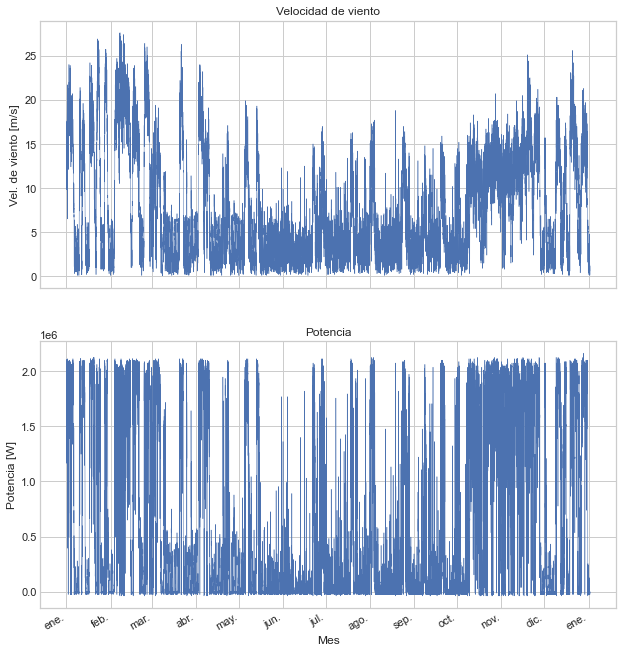

In [18]:
fwidth = 10
fheigth = 12

uniqMonths =dataVP.index.strftime("%m/%y").unique().tolist()

fig,(axvv,axvp)=plt.subplots(nrows=2,sharex=True,figsize=(fwidth,fheigth),frameon=False)
#plot de la velocidad de viento
# axvv=plt.subplot(211,sharex=axvv)
axvv.plot(dataVP.index,dataVP.vViento,linewidth=0.5)
axvv.set_ylabel('Vel. de viento [m/s]')
axvv.set_title('Velocidad de viento')
# axvp = plt.subplot(212,sharex=axvv)
axvp.plot(dataVP.index,dataVP.Pw,linewidth=0.5)
fig.autofmt_xdate()

axvp.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axvp.xaxis.set_major_locator(mdates.MonthLocator(range(1,len(uniqMonths))))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axvp.set_ylabel('Potencia [W]')
axvp.set_xlabel('Mes')
axvp.set_title('Potencia')
fig.subplots_adjust(top=0.88,left=0.1)
if flagsaveim:
    plt.savefig('reporte/figuras/seriesvvvp.png')


## Scatter con colores

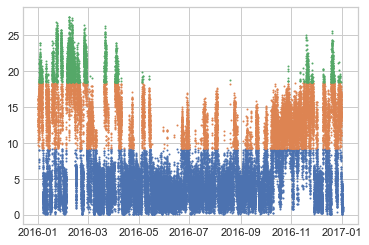

In [19]:
tercio = dataVP.vViento.max()/3
d1 =dataVP[dataVP.vViento<=tercio]
d2 =dataVP[(dataVP.vViento>tercio) & (dataVP.vViento<tercio*2)]
d3= dataVP[dataVP.vViento>tercio*2]
plt.figure()
plt.scatter(d1.index,d1.vViento,s=1)
plt.scatter(d2.index,d2.vViento,s=1)
plt.scatter(d3.index,d3.vViento,s=1)


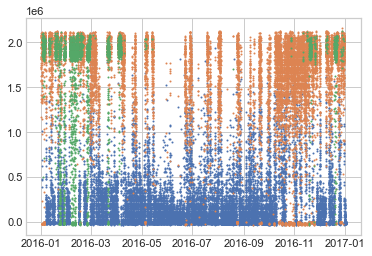

In [20]:
plt.figure()
plt.scatter(d1.index,d1.Pw,s=1)
plt.scatter(d2.index,d2.Pw,s=1)
plt.scatter(d3.index,d3.Pw,s=1)

## Plot velocidad de viento vxvy y potencia

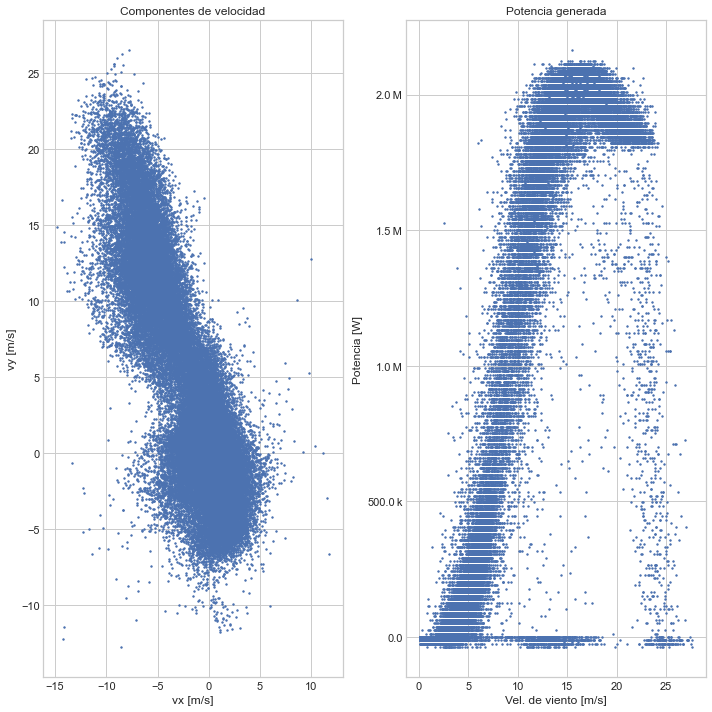

In [21]:

formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
fig,(axvv,axvp)=plt.subplots(ncols=2,figsize=(fwidth,fheigth-2))
axvv.scatter(dfVecVel.vx,dfVecVel.vy,s=2)
axvv.set_ylabel('vy [m/s]')
axvv.set_xlabel('vx [m/s]')
axvv.set_title('Componentes de velocidad')
axvp.scatter(dataVP.vViento,dataVP.Pw,s=2)
axvp.yaxis.set_major_formatter(formatter1)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axvp.set_ylabel('Potencia [W]')
axvp.set_xlabel('Vel. de viento [m/s]')
axvp.set_title('Potencia generada')
fig.subplots_adjust(top=0.88,left=0.1)
plt.tight_layout()
if flagsaveim:
    plt.savefig('reporte/figuras/plotvvp.png')
    #falta agregar la rosa de los vientos al p lot
       

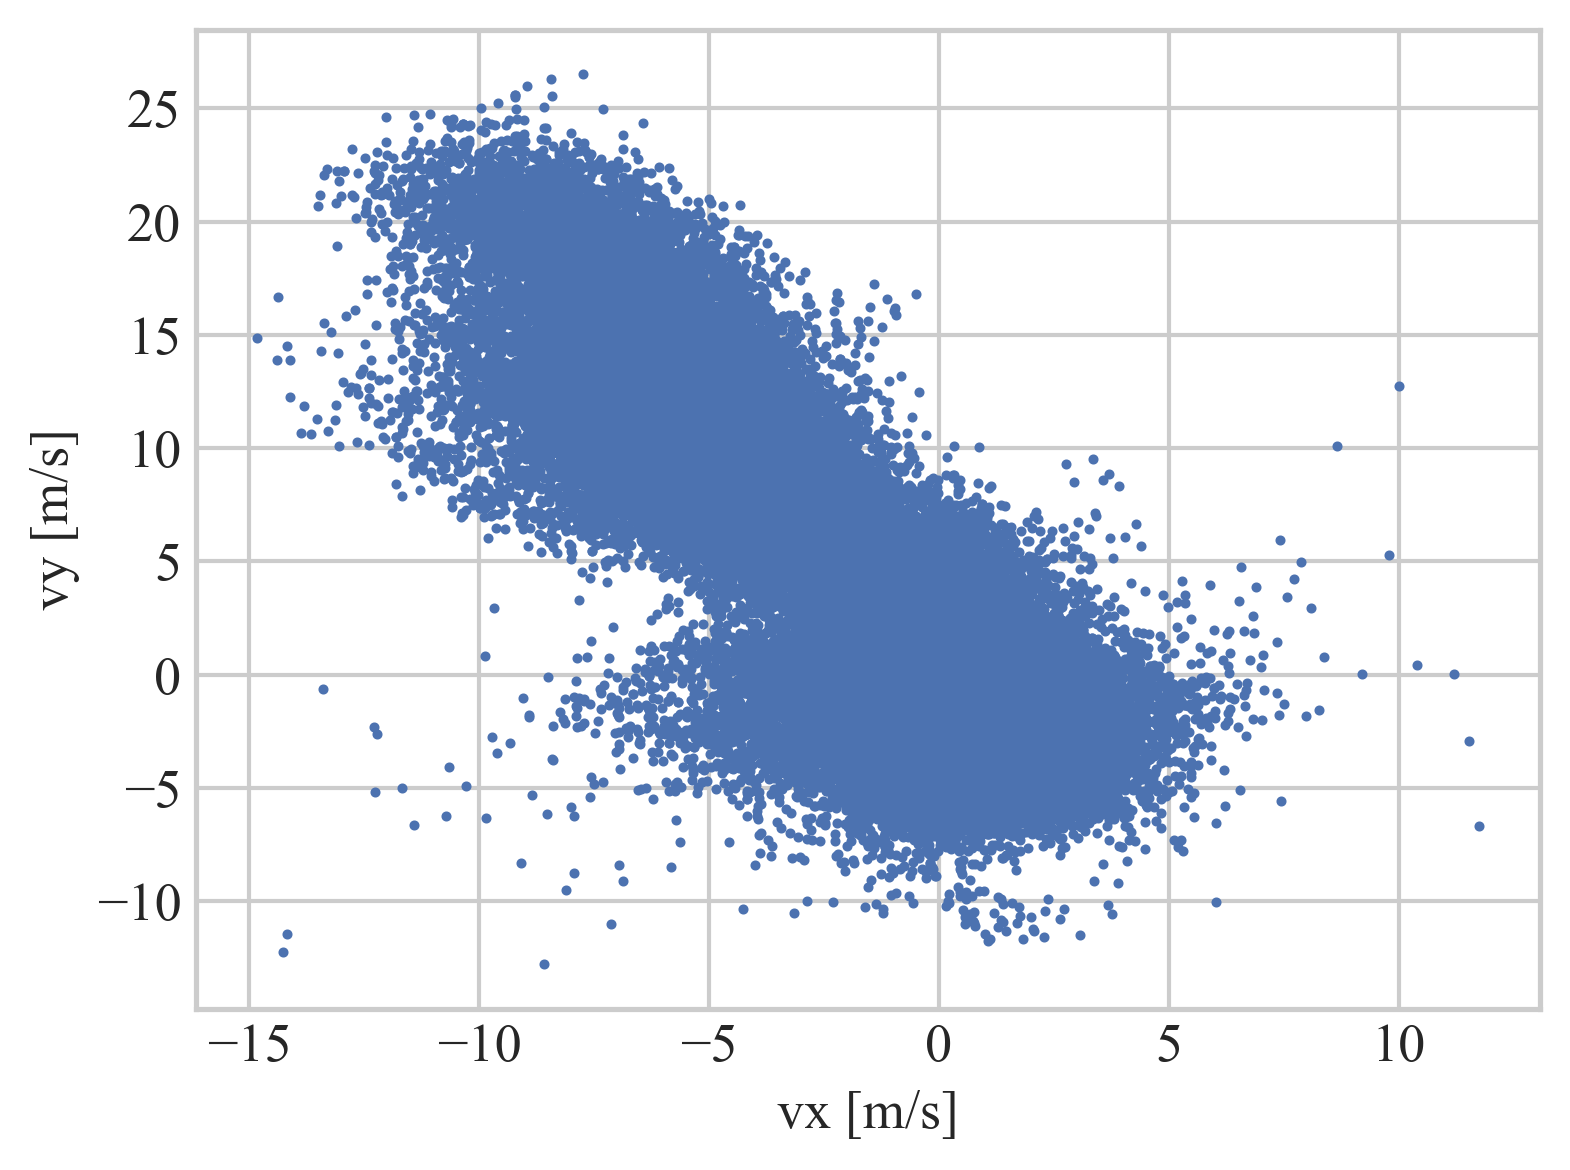

In [22]:
fontsize = 13
labelFontSize = 13
tickFontSize = 12
markerSize = 100
fontNameLabel = {'fontname':'Times New Roman'}
fontNameCluster = {'fontname':'Arial'}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=labelFontSize, weight='normal', stretch='normal')        

formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
extraHeigth = 500/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 0
plt.figure(102,figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)
plt.scatter(dfVecVel.vx,dfVecVel.vy,s=2)
plt.ylabel('vy [m/s]',fontsize = labelFontSize, **fontNameLabel)
plt.xlabel('vx [m/s]',fontsize = labelFontSize, **fontNameLabel)
for label in plt.gca().get_xticklabels():
        label.set_fontproperties(ticks_font)
for label in plt.gca().get_yticklabels():
        label.set_fontproperties(ticks_font)
plt.tight_layout()
if flagsaveim:
    plt.savefig('reporte/figuras/scatterwindvel.png')
tmpFigFilename = 'fig_art/scatterwindvel'+'.'+'jpg'
plt.savefig(tmpFigFilename)

    #falta agregar la rosa de los vientos al p lot

## Varias gráficas en una

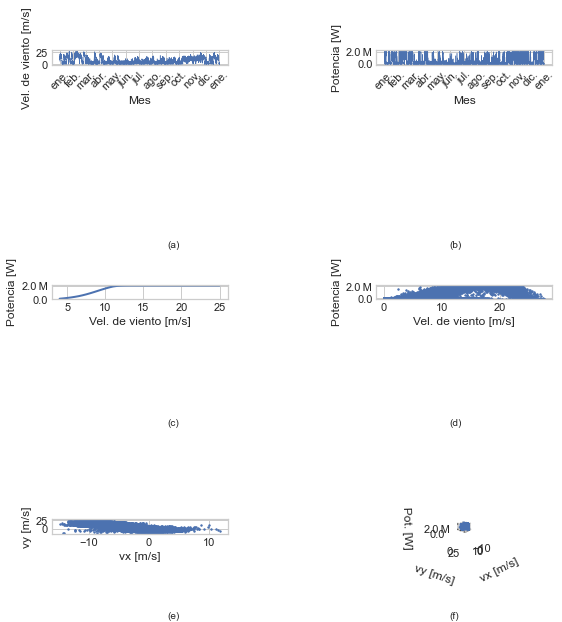

In [23]:
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009

fig = plt.figure(figsize=(8,8))
axsv= plt.subplot2grid((3, 4), (0, 0), colspan=2)
axsp = plt.subplot2grid((3, 4), (0, 2), colspan=2)
axfab = plt.subplot2grid((3, 4), (1, 0), colspan=2)
axreal= plt.subplot2grid((3, 4), (1, 2), colspan=2)
axvxvy =plt.subplot2grid((3, 4), (2, 0), colspan=2)
ax3d =plt.subplot2grid((3, 4), (2, 2), colspan=2, projection='3d')
fig = plt.gcf()




#plot de la velocidad de viento
# axvv=plt.subplot(211,sharex=axvv)
axsv.plot(dataVP.index,dataVP.vViento,linewidth=0.5)
axsv.set_ylabel('Vel. de viento [m/s]')
#axvv.set_title('Velocidad de viento')
axsv.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axsv.xaxis.set_major_locator(mdates.MonthLocator(range(1,len(uniqMonths))))
axsv.set_xlabel('Mes')

plt.setp(axsv.xaxis.get_majorticklabels(), rotation=45)

# axvp = plt.subplot(212,sharex=axvv)
axsp.plot(dataVP.index,dataVP.Pw,linewidth=0.5)
#fig.autofmt_xdate()
axsp.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axsp.xaxis.set_major_locator(mdates.MonthLocator(range(1,len(uniqMonths))))
axsp.set_ylabel('Potencia [W]')
axsp.set_xlabel('Mes')
#axvp.set_title('Potencia')
axsp.yaxis.set_major_formatter(formatter1)
plt.setp(axsp.xaxis.get_majorticklabels(), rotation=45)

axfab.plot(dfMfgCurve.index,dfMfgCurve.pw,linewidth=2)
axfab.set_ylabel('Potencia [W]')
axfab.set_xlabel('Vel. de viento [m/s]')
axfab.yaxis.set_major_formatter(formatter1)

axreal.scatter(dataVP.vViento,dataVP.Pw,s=2)
axreal.yaxis.set_major_formatter(formatter1)
axreal.set_ylabel('Potencia [W]')
axreal.set_xlabel('Vel. de viento [m/s]')

axvxvy.scatter(dfVecVel.vx,dfVecVel.vy,s=2)
axvxvy.set_ylabel('vy [m/s]')
axvxvy.set_xlabel('vx [m/s]')


ax3d.scatter(dfVecVel.vx, dfVecVel.vy, dataVP.Pw,s=1)
ax3d.zaxis.set_major_formatter(formatter1)

ax3d.view_init(elev=20, azim=40)
ax3d.set_xlabel('\n' +'vx [m/s]', linespacing=1)
ax3d.set_ylabel('\n' +'vy [m/s]', linespacing=1)
ax3d.set_zlabel('\n' +'Pot. [W]', linespacing=1)
ax3d.xaxis.pane.fill = False
ax3d.yaxis.pane.fill = False
ax3d.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax3d.xaxis.pane.set_edgecolor('w')
ax3d.yaxis.pane.set_edgecolor('w')
ax3d.zaxis.pane.set_edgecolor('w')

plt.annotate('(a)',xy=(0.29,0.65),xycoords='figure fraction'  )
plt.annotate('(b)',xy=(0.78,0.65),xycoords='figure fraction'  )
plt.annotate('(c)',xy=(0.29,0.34),xycoords='figure fraction'  )
plt.annotate('(d)',xy=(0.78,0.34),xycoords='figure fraction'  )
plt.annotate('(e)',xy=(0.29,0.005),xycoords='figure fraction'  )
plt.annotate('(f)',xy=(0.78,0.005),xycoords='figure fraction'  )
plt.tight_layout()
if flagsaveim:
    plt.savefig('reporte/figuras/figDatos.png')


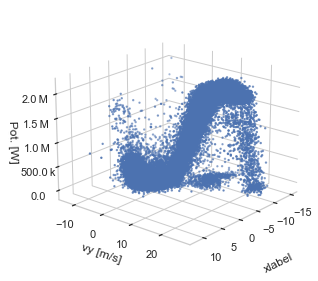

In [24]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import





fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

ax3d.scatter(dfVecVel.vx, dfVecVel.vy, dataVP.Pw,s=2)
ax3d.zaxis.set_major_formatter(formatter1)

ax3d.set_xlabel('vx [m/s]')
ax3d.set_ylabel('vy [m/s]')
ax3d.set_zlabel('Pot. [W]')
ax3d.view_init(elev=20, azim=40)
ax3d.set_xlabel('\n' + 'xlabel', linespacing=4)
ax3d.xaxis.pane.fill = False
ax3d.yaxis.pane.fill = False
ax3d.zaxis.pane.fill = False
# Now set color to white (or whatever is "invisible")
ax3d.xaxis.pane.set_edgecolor('w')
ax3d.yaxis.pane.set_edgecolor('w')
ax3d.zaxis.pane.set_edgecolor('w')
plt.tight_layout()
plt.show()

## Ejemplo de grupos

## grupos naturales

In [25]:
a = dataVP.loc['2016-10-17 00:00':'2016-10-17 19:00']
b = dfVecVel.loc['2016-10-17 00:00':'2016-10-17 19:00']

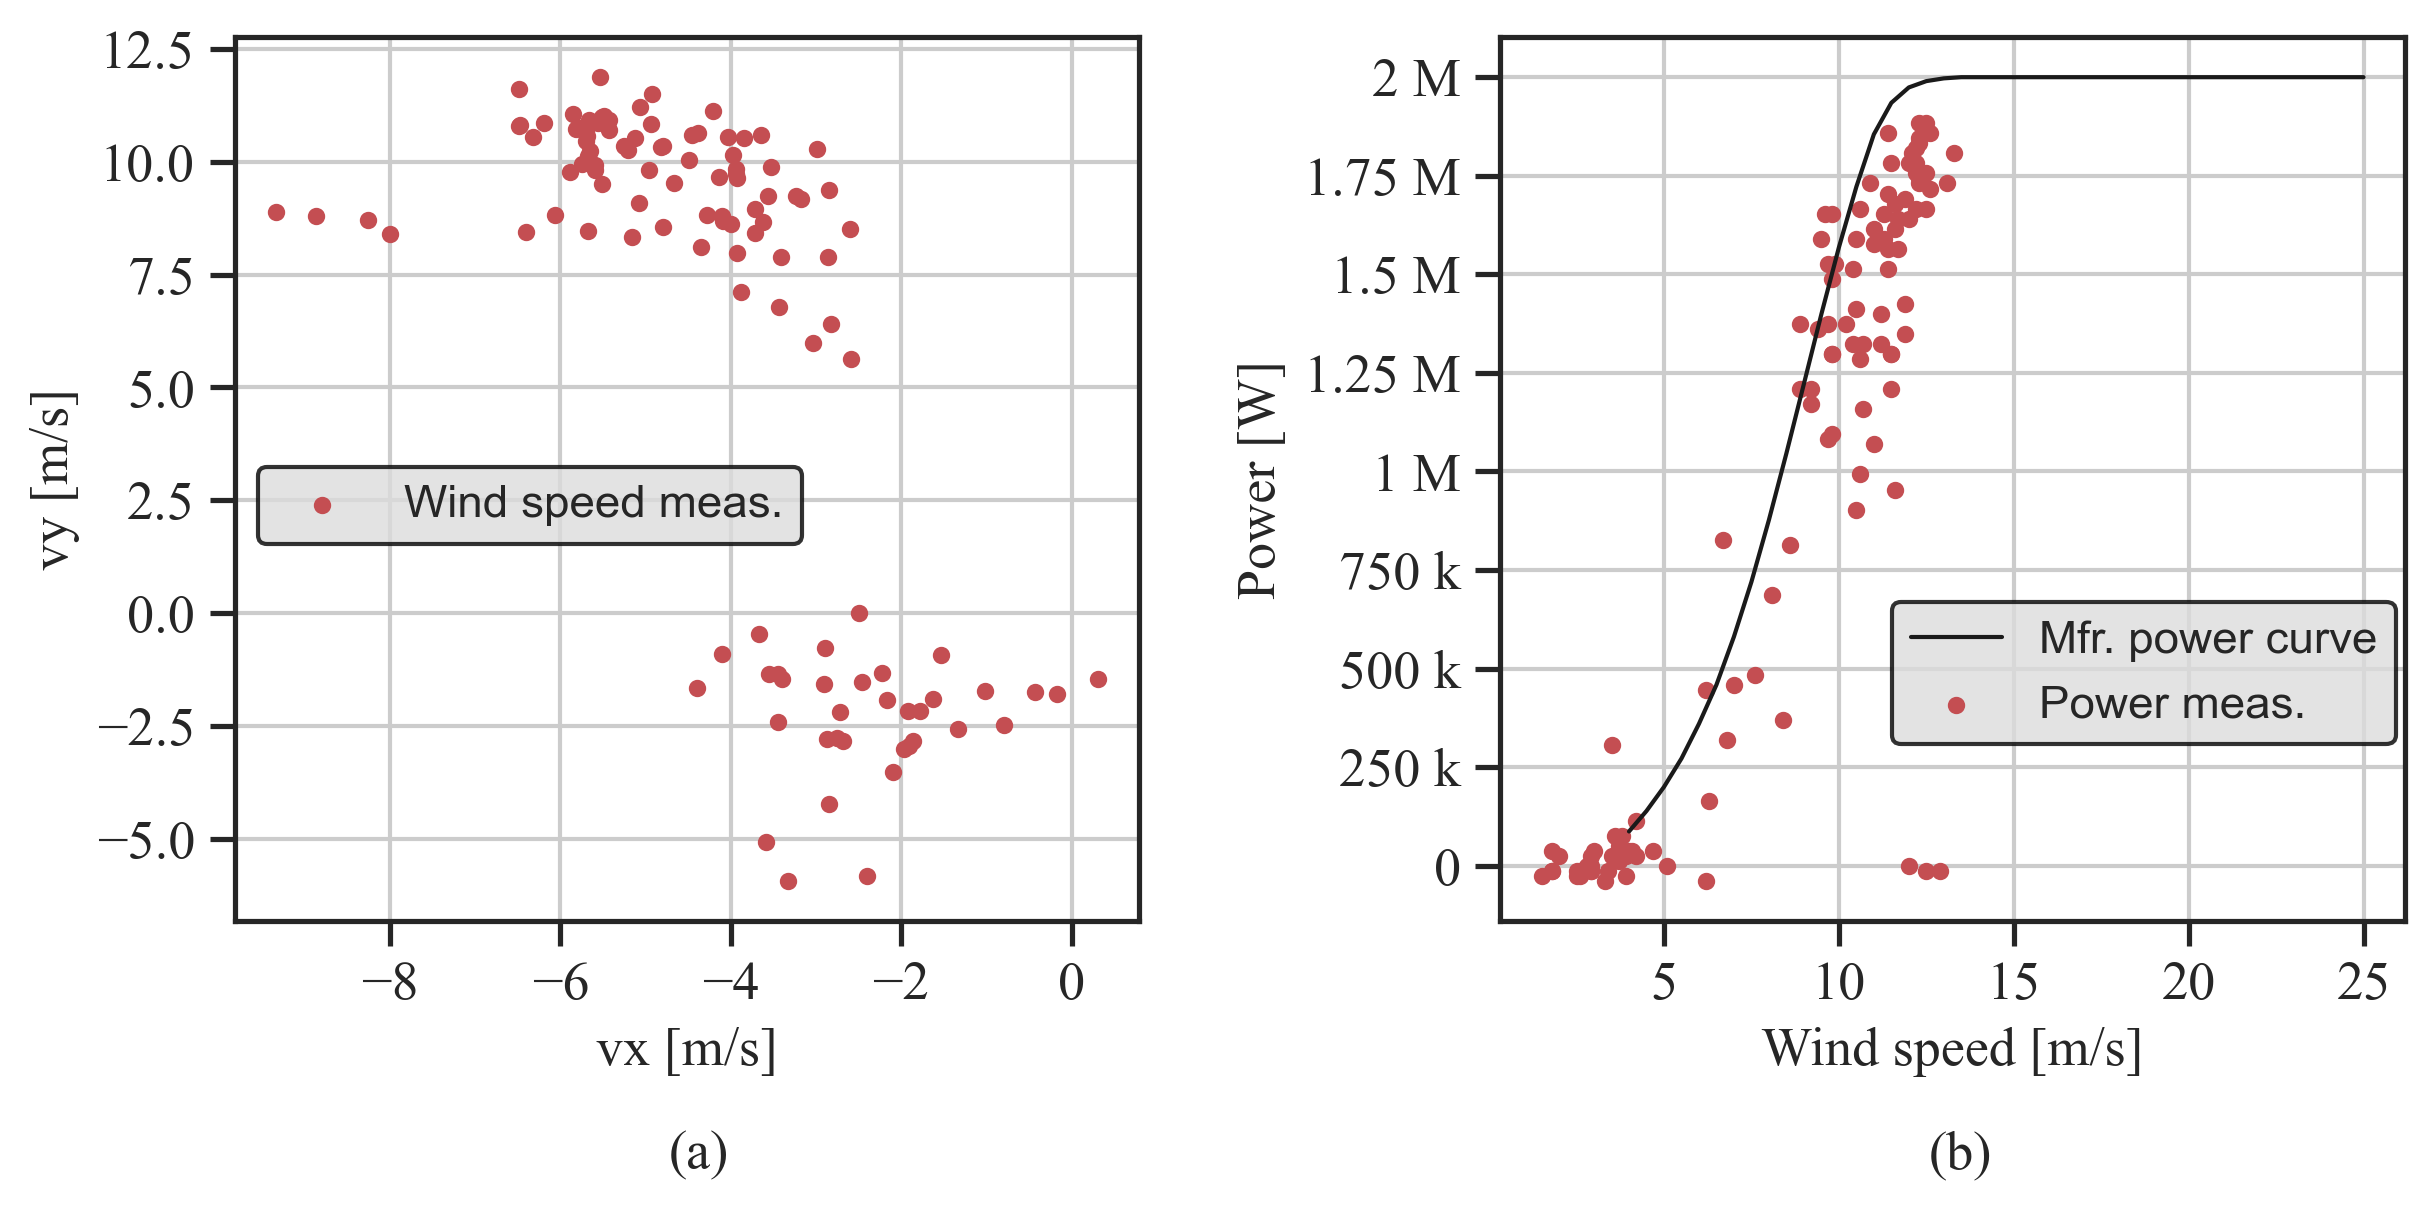

In [26]:
#configurar el marco de la leyenda del plot
legendFrameOpts = {"frameon":"True","facecolor":'gainsboro',"edgecolor":'black'}

import seaborn as sns
sns.set(style="ticks")
fsize = 13
fontNameLabel = 'Times New Roman'
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=fsize, weight='normal', stretch='normal')   

fig, axs = plt.subplots(1,2)
extraHeigth = 600/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 1200/FIGURE_DPI
fig.set_figheight(FIG_HEIGHT_IN_PIXELS + extraHeigth)
fig.set_figwidth(FIG_WIDTH_IN_PIXELS+ extraWidth)
fig.set_dpi(FIGURE_DPI)


axs[1].scatter(a.vViento, a.Pw,s=10,c='r',label='Power meas.')
axs[0].scatter(b.vx, b.vy,s=10,c='r',label='Wind speed meas.')
axs[1].plot(dfMfgCurve.index,dfMfgCurve.pw,c='k',linewidth=1, label = 'Mfr. power curve')
axs[0].grid()
axs[0].set_xlabel('vx [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[0].set_ylabel('vy [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[1].set_xlabel('Wind speed [m/s]',fontsize=fsize,fontname =fontNameLabel)
axs[1].set_ylabel('Power [W]',fontsize=fsize,fontname =fontNameLabel)
axs[0].text(0.28,0.01,'(a)',transform=fig.transSubfigure,fontsize= 13,fontname='Times New Roman')
axs[1].text(0.73,0.01,'(b)',transform=fig.transSubfigure,fontsize= 13,fontname='Times New Roman')

axs[1].grid()

plt.gca().yaxis.set_major_formatter(EngFormatter())
axs[1].legend(bbox_to_anchor=(0.99, 0.2), loc=4, borderaxespad=0.,**legendFrameOpts)
axs[0].legend(bbox_to_anchor=(0, .4), loc=3,**legendFrameOpts)

for label in axs[0].get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[0].get_yticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[1].get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in axs[1].get_yticklabels():
    label.set_fontproperties(ticks_font)
    
fig.subplots_adjust(bottom=0.2,wspace = 0.4 )


tmpFigFilename = 'fig_art/example_states_1235'+'.'+ FIGURE_FORMAT
plt.savefig(tmpFigFilename)

## otros grupos

In [27]:
# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=10, centers=3,
#                        cluster_std=0.9, random_state=2,center_box=(1,2))
# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], s=50);


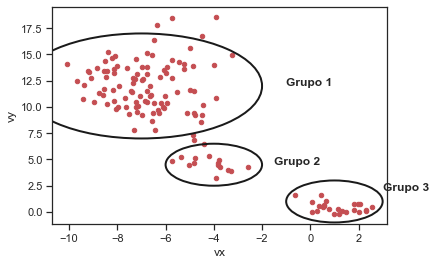

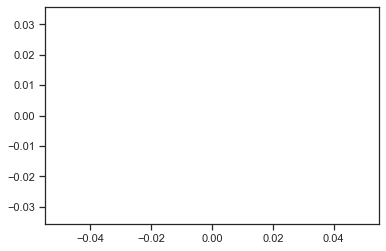

In [28]:
dfejemgrp = dfVecVel.loc[pd.to_datetime('2016-05-13 00:00'):pd.to_datetime('2016-05-13 23:00')]
plt.figure()
plt.scatter(dfejemgrp.vx,dfejemgrp.vy,s=20,c='r')
plt.xlabel('vx',fontsize=12)
plt.ylabel('vy',fontsize=12)
circg1= plt.Circle((-7,12),5,color='k',fill=False,linewidth=2)
circg2= plt.Circle((-4,4.5),2,color='k',fill=False,linewidth=2)
circg3= plt.Circle((1,1),2,color='k',fill=False,linewidth=2)

ax=plt.gca()
ax.add_artist(circg1)
ax.add_artist(circg2)
ax.add_artist(circg3)
ax.text(-1,12,'Grupo 1',fontweight='bold')
ax.text(-1.5,4.5,'Grupo 2',fontweight='bold')
ax.text(3,2,'Grupo 3',fontweight='bold')

plt.show()
plt.axis('equal')
if flagsaveim:
    plt.savefig('reporte/figuras/gruposvv.png')


## Potencias cero y negativas

In [29]:
dataVP_Neg =dataVP[dataVP.Pw<=0]
deltaT = 1/6 #10 minutos es un 
#buscando limits de potencias negativas
npwmin = 5
lpwmin = []
lpwmin.append( dataVP_Neg.Pw.min())

for i in range(1,npwmin):
    lpwmin.append( dataVP_Neg.Pw[dataVP_Neg.Pw>lpwmin[i-1]].min())

locurre = []
llabels =[]
lnhrpotneg =[]
for i in range(npwmin):
    n = len(dataVP_Neg[dataVP_Neg.Pw==lpwmin[i]])
    locurre.append(n)
    llabels.append('{:3.4f}kW'.format(lpwmin[i]/1e3))
    lnhrpotneg.append(n*10/60)
    print('{:d}-Potencia {:3.4f}kW- Ocurrencias: {:d} - Horas: {:.4f}-Consumo:{:.2f}kW'
          .format(i+1,lpwmin[i]/1e3,n,n*10/60,locurre[i]*lpwmin[i]*deltaT/1e3))
print('Total consumido:{:0.4f} kWh'.format(dataVP_Neg.Pw.sum()*deltaT/1e3))

idx =np.argsort(locurre)
llabelssort =[llabels[i] for i in idx]
lpwminsort = [lpwmin[i] for i in idx]
lnhrpotnegsort =[lnhrpotneg[i] for i in idx]
locurresort = [locurre[i] for i in idx]



1-Potencia -38.1704kW- Ocurrencias: 77 - Horas: 12.8333-Consumo:-489.85kW
2-Potencia -25.4469kW- Ocurrencias: 1194 - Horas: 199.0000-Consumo:-5063.93kW
3-Potencia -19.0852kW- Ocurrencias: 3 - Horas: 0.5000-Consumo:-9.54kW
4-Potencia -12.7235kW- Ocurrencias: 10012 - Horas: 1668.6667-Consumo:-21231.20kW
5-Potencia 0.0000kW- Ocurrencias: 7419 - Horas: 1236.5000-Consumo:0.00kW
Total consumido:-26794.5259 kWh


### Stem potencias cero y negativas

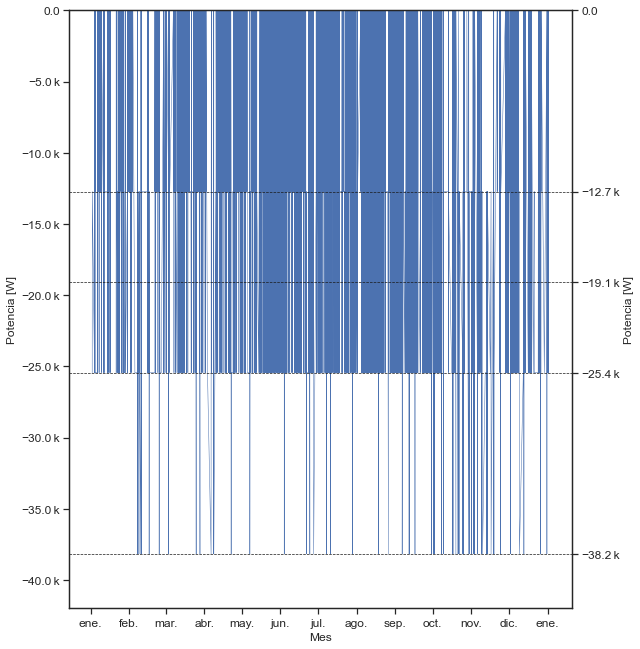

In [30]:
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
plt.figure(figsize=(fwidth-1,fheigth-1))
plt.plot(dataVP_Neg.index,dataVP_Neg.Pw,linewidth=.5)
# _, stemlines, _ =plt.stem(dataVP_Neg.index,dataVP_Neg.Pw, markerfmt=" ")
# plt.setp(stemlines, 'linewidth', 0.5)
plt.ylim([dataVP_Neg.Pw.min()*1.1,0])
ax1=  plt.gca()
ax1.set_ylabel('Potencia [W]',fontsize=12)
ax1.set_xlabel('Mes',fontsize=12)
ax1.tick_params(labelsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(range(1,len(uniqMonths))))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.yaxis.set_major_formatter(formatter1)
ax2.set_ylabel('Potencia [W]',fontsize=12)
ax2.tick_params(labelsize=12)

for i in range(len(lpwmin)):
    plt.axhline(y=lpwmin[i],linestyle='--',linewidth=0.7,c='k')

plt.yticks(lpwmin)
ax2.yaxis.set_major_formatter(formatter1)
plt.ylim([dataVP_Neg.Pw.min()*1.1,0])

#anotaciones de potencias negativas (NO SE USAN)
bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.7)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=100, va="center",fontsize=10)
horizontalalignment = {-1: "center", 1: "center"}
connectionstyle = "angle,angleA=0,angleB=90"
kw["arrowprops"].update({"connectionstyle": connectionstyle,'color':'black','linewidth':0.9})


for p in list(dataVP_Neg.Pw.unique()):
    temp = dataVP[dataVP.Pw==p]
    if len(temp)==1:#una sola potencia
        fecha  = temp.index.strftime( '%d/%B/%y').format()[0]
        hora = temp.index.strftime( '%H:%M').format()[0]
        x = temp.index 
        y= temp.Pw
        
        plt.annotate(fecha + '\n'+hora,xy=(x,y), xytext=(x+ pd.DateOffset(months=1), y*1.07),ha='center',**kw)

plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/stempotneg.png')


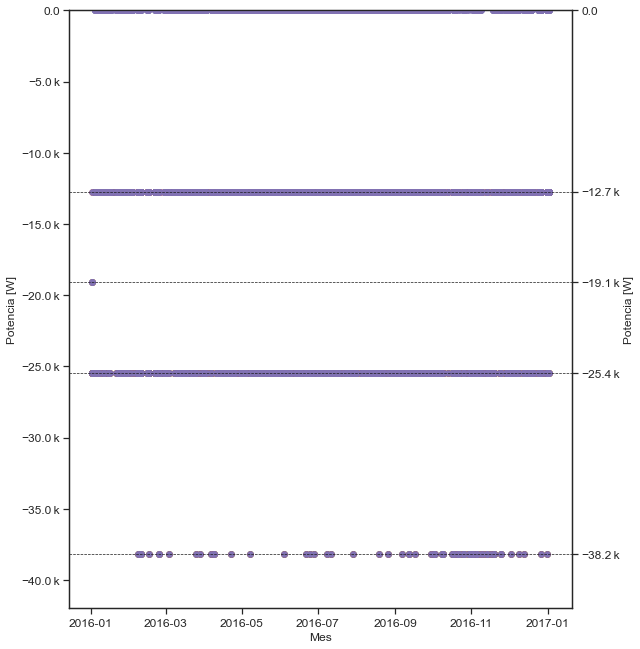

In [31]:
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
plt.figure(figsize=(fwidth-1,fheigth-1))
# _, stemlines, _ =plt.stem(dataVP_Neg.index,dataVP_Neg.Pw, markerfmt=" ")
# plt.setp(stemlines, 'linewidth', 0.5)
plt.ylim([dataVP_Neg.Pw.min()*1.1,0])
ax1=  plt.gca()
ax1.set_ylabel('Potencia [W]',fontsize=12)
ax1.set_xlabel('Mes',fontsize=12)
ax1.tick_params(labelsize=12)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(range(1,len(uniqMonths))))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.yaxis.set_major_formatter(formatter1)
ax2.set_ylabel('Potencia [W]',fontsize=12)
ax2.tick_params(labelsize=12)

for i in range(len(lpwmin)):
    temp =dataVP_Neg[dataVP_Neg.Pw<=lpwmin[i]]
    plt.scatter(temp.index,temp.Pw,linewidth=.5)
    plt.axhline(y=lpwmin[i],linestyle='--',linewidth=0.7,c='k')


plt.yticks(lpwmin)
ax2.yaxis.set_major_formatter(formatter1)
plt.ylim([dataVP_Neg.Pw.min()*1.1,0])
#anotaciones de potencias negativas
bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.7)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=100, va="center",fontsize=10)
horizontalalignment = {-1: "center", 1: "center"}
connectionstyle = "angle,angleA=0,angleB=90"
kw["arrowprops"].update({"connectionstyle": connectionstyle,'color':'black','linewidth':0.9})


for p in list(dataVP_Neg.Pw.unique()):
    temp = dataVP[dataVP.Pw==p]
    if len(temp)==1:#una sola potencia
        fecha  = temp.index.strftime( '%d/%B/%y').format()[0]
        hora = temp.index.strftime( '%H:%M').format()[0]
        x = temp.index 
        y= temp.Pw
        
        plt.annotate(fecha + '\n'+hora,xy=(x,y), xytext=(x+ pd.DateOffset(months=1), y*1.07),ha='center',**kw)

plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/stempotneg.png')
#plt.savefig('reporte/figuras/stempotneg.png')


###  Inicio pie charts


In [32]:
# NO SE OCUPA PUES SON SOLO 4 POTENCIAS NEGATIVAS Y UN CERO
#agrupar eventos menores 
mena=12 #menor a n ocurrencias
cotro = 0 #contador de otros
potro=0 #suma de potencias otro
locred =[]#locurre reducido
llabred=[]
lpwminred =[]

for i in range(len(locurre)):
    if locurre[i] <= mena:
        cotro =cotro+locurre[i]
        potro = potro+lpwmin[i]*locurre[i]
    else:
        locred.append(locurre[i])
        llabred.append(llabels[i])
        lpwminred.append(lpwmin[i])
#añadiendo el "otro"        
locred.append(cotro)
llabred.append('Otro')
lpwminred.append(potro)
idx =np.argsort(locred)
llabredsort =[llabred[i] for i in idx]
lpwminredsort = [lpwminred[i] for i in idx]
lnhrpotnegsort =[lnhrpotneg[i] for i in idx]
locredsort = [locred[i] for i in idx]

lsumpot = []# potencias multiplicadas por sus ocurrencias
lsumpot.append(lpwminredsort[0])
for i in range(1,len(lpwminredsort)):
    lsumpot.append(lpwminredsort[i]*locredsort[i])


### Pie chart normal (potencia)

In [33]:
len(locredsort
)

5

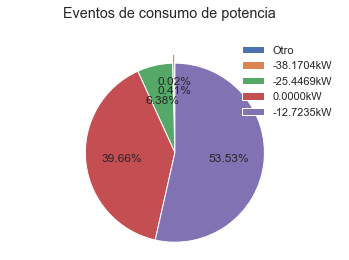

No. de eventos: 3 - Pot. consumida: Otro - Total -57.256kW
No. de eventos: 77 - Pot. consumida: -38.1704kW - Total -2939.117kW
No. de eventos: 1194 - Pot. consumida: -25.4469kW - Total -30383.599kW
No. de eventos: 7419 - Pot. consumida: 0.0000kW - Total 0.000kW
No. de eventos: 10012 - Pot. consumida: -12.7235kW - Total -127387.184kW
Potencia total consumida: -160767.156kW
Potencia total consumida (datos): -160767.156kW


In [34]:

explode = (0.2,0.1, 0, 0,0)  # explode 1st slice

plt.figure()
plt.suptitle('Eventos de consumo de potencia')
plt. pie(locredsort, autopct='%1.2f%%',explode=explode,
        shadow=False, startangle=90)
plt.gca().axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=llabredsort)
plt.show()    

sumpotneg=lpwminredsort[0]/1e3
print('No. de eventos: %d - Pot. consumida: %s - Total %0.3fkW'%(locredsort[0],llabredsort[0],
                                                                     lpwminredsort[0]/1e3))
for i in range(1,len(locred)):
    print('No. de eventos: %d - Pot. consumida: %s - Total %0.3fkW'%(locredsort[i],llabredsort[i],
                                                                     lpwminredsort[i]*locredsort[i]/1e3))
    sumpotneg+= lpwminredsort[i]*locredsort[i]/1e3
print('Potencia total consumida: %0.3fkW'%(sumpotneg))
print('Potencia total consumida (datos): %0.3fkW'%(dataVP_Neg.Pw.sum()/1e3))

### Pie chart (potencia)

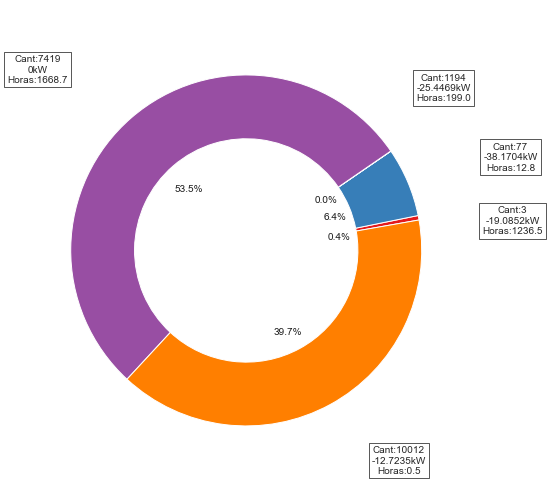

In [35]:
#pie chart
from matplotlib.text import OffsetFrom


cmap = plt.get_cmap("Set1")
colors = cmap(range(cmap.N))


fig, ax = plt.subplots(figsize=(fwidth-3, fheigth-3), subplot_kw=dict(aspect="equal"))
data = locurre
explode = (0,0, 0, 0,0)  
wedges, texts,textspct = ax.pie(data, wedgeprops=dict(width=0.4), startangle=10, autopct='%1.1f%%',
                         textprops={'color':"k",'fontsize': 10,'va':'top'}, 
                         pctdistance=1,colors=colors,explode=explode,radius=1.1)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=10)

#lista que enumera (numero de elemento,objeto wedge)
lwedges =[(i, j) for i, j in enumerate(wedges)]
lwedges=[]
n=len(wedges)-1
for w in wedges:
    lwedges.append((n,w))
    n=n-1
#inviertiendo el orden de las listas para que el gráfico se dibuje mejor
rlocurresort = list(reversed(locurresort))
rlpwminsort=list(reversed(lpwminsort))
rlnhrpotnegsort=list(reversed(lnhrpotnegsort))

boxxy=[(2,1.5),(2,1.5),(1.5,1.8),(1.8,1.5),(1.7,1)]#posicion xy de las cajas
for i,p in (lwedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "center", 1: "center"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    #connectionstyle = "angle,angleA=,angleB=90"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate('Cant:' +str(rlocurresort[i]) + '\n' 
                +'{:n}kW'.format(rlpwminsort[i]/1e3) +
                '\nHoras:{:.1f}'.format(rlnhrpotnegsort[i]), 
             xy=(x, y), xytext=(boxxy[i][0]*x,boxxy[i][1]*y),
             horizontalalignment=horizontalalignment, **kw)

#acomodando los textos de los porcentajes a mono
pctdists = [0.54, 0.55, 0.55, 0.5,0.5]

for t,d in zip(textspct, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))    

    plt.axis('equal')
plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/pieEvConsEner.png')


### Pie chart (Energía)

1-Potencia -38.1704kW- Ocurrencias: 77 - Horas: 12.8333-Consumo:-489.85kW
2-Potencia -25.4469kW- Ocurrencias: 1194 - Horas: 199.0000-Consumo:-5063.93kW
3-Potencia -19.0852kW- Ocurrencias: 3 - Horas: 0.5000-Consumo:-9.54kW
4-Potencia -12.7235kW- Ocurrencias: 10012 - Horas: 1668.6667-Consumo:-21231.20kW
Total consumido:-26794.5259 kWh


C:\Users\mungu\AppData\Local\Temp/ipykernel_11784/1560013670.py:70: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  '\n%s kWh'%locale.format("%.2f", rlsumpot[i]*deltaT/1e3, grouping=True) +


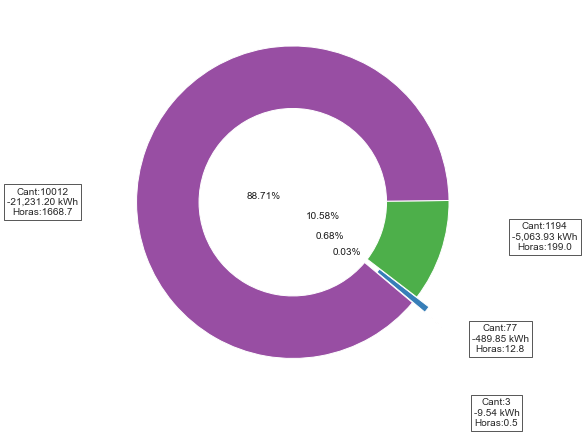

In [36]:
#este pie chart no incluye el cero pues es de consumos
dataVP_Neg =dataVP[dataVP.Pw<0]
deltaT = 1/6 #10 minutos es un sexto de hora
#buscando limits de potencias negativas
npwmin = 4
lpwmin = []
lpwmin.append( dataVP_Neg.Pw.min())

for i in range(1,npwmin):
    lpwmin.append( dataVP_Neg.Pw[dataVP_Neg.Pw>lpwmin[i-1]].min())

locurre = []
llabels =[]
lnhrpotneg =[]
for i in range(npwmin):
    n = len(dataVP_Neg[dataVP_Neg.Pw==lpwmin[i]])
    locurre.append(n)
    llabels.append('{:3.4f}kW'.format(lpwmin[i]/1e3))
    lnhrpotneg.append(n*10/60)
    print('{:d}-Potencia {:3.4f}kW- Ocurrencias: {:d} - Horas: {:.4f}-Consumo:{:.2f}kW'
          .format(i+1,lpwmin[i]/1e3,n,n*10/60,locurre[i]*lpwmin[i]*deltaT/1e3))
print('Total consumido:{:0.4f} kWh'.format(dataVP_Neg.Pw.sum()*deltaT/1e3))

idx =np.argsort(locurre)
llabelssort =[llabels[i] for i in idx]
lpwminsort = [lpwmin[i] for i in idx]
lnhrpotnegsort =[lnhrpotneg[i] for i in idx]
locurresort = [locurre[i] for i in idx]
#inviertiendo el orden de las listas para que el gráfico se dibuje mejor
rlocurresort = list(reversed(locurresort))
rlpwminsort=list(reversed(lpwminsort))
rlnhrpotnegsort=list(reversed(lnhrpotnegsort))

lsumpot = []# potencias multiplicadas por sus ocurrencias
for i in range(len(lpwminsort)):
    lsumpot.append(lpwminsort[i]*locurresort[i])
rlsumpot=list(reversed(lsumpot))

data = locurresort
explode = (0.25,0.1, 0,0)  
fig, ax = plt.subplots(figsize=(fwidth-3, fheigth-3), subplot_kw=dict(aspect="equal"))
cmap = plt.get_cmap("Set1")
colors = cmap(range(cmap.N))
wedges, texts,textspct = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40, autopct='%1.2f%%',
                         textprops={'color':"k",'fontsize': 10,'va':'top'}, 
                         pctdistance=0.2,colors=colors,explode=explode)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=10)

#lista que enumera (numero de elemento,objeto wedge)
lwedges =[(i, j) for i, j in enumerate(wedges)]
lwedges=[]
n=len(wedges)-1
for w in wedges:
    lwedges.append((n,w))
    n=n-1

for i,p in (lwedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "center", 1: "center"}[int(np.sign(x))]
    #connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    connectionstyle = "angle,angleA=0,angleB=90"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    ax.annotate('Cant:' +str(rlocurresort[i])+
                '\n%s kWh'%locale.format("%.2f", rlsumpot[i]*deltaT/1e3, grouping=True) +
                '\nHoras:{:.1f}'.format(rlnhrpotnegsort[i]), 
             xy=(x, y), xytext=(x*1.7,y*0.7*i),
             horizontalalignment=horizontalalignment, **kw)
plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/pieEvConsEner.png')


In [37]:
lnhrpotnegsort

[0.5, 12.833333333333334, 199.0, 1668.6666666666667]

## Estaciones

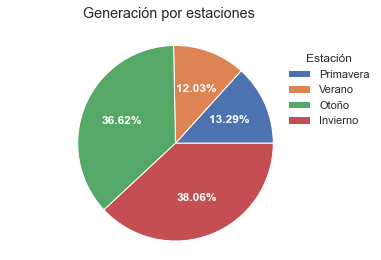


---ESTACIONES----
Potencia producida en primavera 4739.6MW
Potencia producida en verano 4290.5MW
Potencia producida en otoño 13063.9MW
Potencia producida en invierno 13576.9MW
Potencia total producida (estaciones) 35670.963 MW
Potencia total producida (datos) 35670.963 MW


In [38]:
#estaciones
primavera_inicio = pd.to_datetime('21-03-2016')
verano_inicio = pd.to_datetime('21-06-2016')
otonio_inicio = pd.to_datetime('21-09-2016') 
invierno_inicio = pd.to_datetime('21-12-2016')

maskPrim = ( (dataVP.index >=primavera_inicio ) &(dataVP.index <verano_inicio ))
potPrim = dataVP.loc[maskPrim].Pw.sum()

maskVer = ( (dataVP.index >=verano_inicio  ) &(dataVP.index <otonio_inicio ))
potVer = dataVP.loc[maskVer].Pw.sum()

maskOtonio= ( (dataVP.index >=otonio_inicio ) &(dataVP.index <invierno_inicio ))
potOtonio = dataVP.loc[maskOtonio].Pw.sum()

maskInv = ( (dataVP.index< primavera_inicio) | (dataVP.index >=invierno_inicio ))
potInv = dataVP.loc[maskInv].Pw.sum()
#energia por hora
potprimehr =  potPrim/60

lpotest=[potPrim,potVer,potOtonio,potInv]
lpotestlab = ['Primavera','Verano','Otoño','Invierno']
#pie chart

plt.figure()
plt.suptitle('Generación por estaciones')
explode= (0,0,0,0)
wedges, texts, autotexts = plt. pie(lpotest, autopct='%1.2f%%',explode=explode, textprops=dict(color="w"),
        shadow=False, startangle=0)
plt.gca().axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt .legend(wedges, lpotestlab,
          title="Estación",
          loc="center left",
          bbox_to_anchor=(0.81, 0, 0, 1.5))
plt.setp(autotexts, size=12, weight="bold")


plt.show()    




print('\n---ESTACIONES----')
print('Potencia producida en primavera {:3.1f}MW'.format(potPrim/1e6))
print('Potencia producida en verano {:3.1f}MW'.format(potVer/1e6))
print('Potencia producida en otoño {:3.1f}MW'.format(potOtonio/1e6))
print('Potencia producida en invierno {:3.1f}MW'.format(potInv/1e6))
print('Potencia total producida (estaciones) %0.3f MW'%((potInv+potOtonio+potPrim+potVer)/1e6))
print('Potencia total producida (datos) %0.3f MW'%((dataVP.Pw.sum())/1e6))




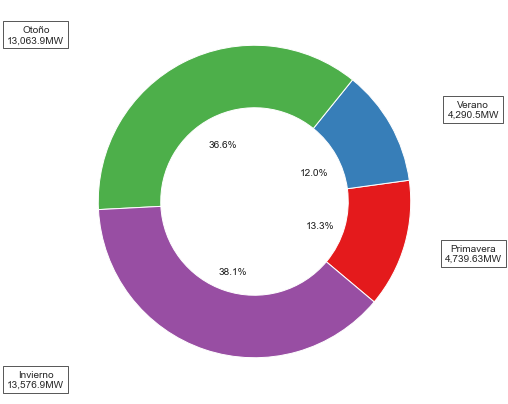


---ESTACIONES----
Potencia producida en primavera 4739.6MW
Potencia producida en verano 4290.5MW
Potencia producida en otoño 13063.9MW
Potencia producida en invierno 13576.9MW
Potencia total producida (estaciones) 35670.963 MW
Potencia total producida (datos) 35670.963 MW


In [39]:
#estaciones Potencia 
primavera_inicio = pd.to_datetime('21-03-2016')
verano_inicio = pd.to_datetime('21-06-2016')
otonio_inicio = pd.to_datetime('21-09-2016') 
invierno_inicio = pd.to_datetime('21-12-2016')

maskPrim = ( (dataVP.index >=primavera_inicio ) &(dataVP.index <verano_inicio ))
potPrim = dataVP.loc[maskPrim].Pw.sum()
enerPrim = potPrim*1/6 #cada 10 minutos es 1/6 de hora

maskVer = ( (dataVP.index >=verano_inicio  ) &(dataVP.index <otonio_inicio ))
potVer = dataVP.loc[maskVer].Pw.sum()
enerVer = potVer *1/6

maskOtonio= ( (dataVP.index >=otonio_inicio ) &(dataVP.index <invierno_inicio ))
potOtonio = dataVP.loc[maskOtonio].Pw.sum()
enerOtonio = potOtonio*1/6

maskInv = ( (dataVP.index< primavera_inicio) | (dataVP.index >=invierno_inicio ))
potInv = dataVP.loc[maskInv].Pw.sum()
enerInv = potInv*1/6

lpotest=[potPrim,potVer,potOtonio,potInv]
lenerest=[enerPrim,enerVer,enerOtonio,enerInv]
lpotestlab = ['Primavera','Verano','Otoño','Invierno']

#pie chart
cmap = plt.get_cmap("Set1")
colors = cmap(range(cmap.N))

fig, ax = plt.subplots(figsize=(fwidth-3, fheigth-3), subplot_kw=dict(aspect="equal"))


data = lpotest

wedges, texts,textspct = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40, autopct='%1.1f%%',
                         textprops={'color':"k",'fontsize': 10,'va':'top'}, 
                         pctdistance=0.44,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=10)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "center", 1: "center"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(lpotestlab[i]+str('\n')+str('{:n}MW').format(lpotest[i]/1e6), 
                 xy=(x, y), xytext=(1.4*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)


plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/pieGenEst.png')

print('\n---ESTACIONES----')
print('Potencia producida en primavera {:3.1f}MW'.format(potPrim/1e6))
print('Potencia producida en verano {:3.1f}MW'.format(potVer/1e6))
print('Potencia producida en otoño {:3.1f}MW'.format(potOtonio/1e6))
print('Potencia producida en invierno {:3.1f}MW'.format(potInv/1e6))
print('Potencia total producida (estaciones) %0.3f MW'%((potInv+potOtonio+potPrim+potVer)/1e6))
print('Potencia total producida (datos) %0.3f MW'%((dataVP.Pw.sum())/1e6))



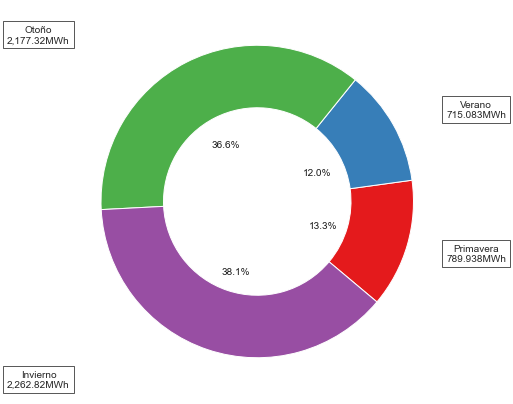


---ESTACIONES----
Energía producida en primavera 789.9MWh
Energía producida en verano 715.1MWh
Energía producida en otoño 2177.3MWh
Energía producida en invierno 2262.8MWh
Energía total producida (estaciones): 5945.160 MWh
Energía total producida (datos): 5945.160 MWh


In [40]:
#estaciones energía

#pie chart
cmap = plt.get_cmap("Set1")
colors = cmap(range(cmap.N))

fig, ax = plt.subplots(figsize=(fwidth-3, fheigth-3), subplot_kw=dict(aspect="equal"))


data = lenerest

wedges, texts,textspct = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40, autopct='%1.1f%%',
                         textprops={'color':"k",'fontsize': 10,'va':'top'}, 
                         pctdistance=0.44,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center",fontsize=10)

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "center", 1: "center"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(lpotestlab[i]+str('\n')+str('{:n}MWh').format(lenerest[i]/1e6), 
                 xy=(x, y), xytext=(1.4*np.sign(x), 1.2*y),
                 horizontalalignment=horizontalalignment, **kw)


plt.show()
if flagsaveim:
    plt.savefig('reporte/figuras/pieGenEstEner.png')
print('\n---ESTACIONES----')
print('Energía producida en primavera {:3.1f}MWh'.format(enerPrim/1e6))
print('Energía producida en verano {:3.1f}MWh'.format(enerVer/1e6))
print('Energía producida en otoño {:3.1f}MWh'.format(enerOtonio/1e6))
print('Energía producida en invierno {:3.1f}MWh'.format(enerInv/1e6))
print('Energía total producida (estaciones): %0.3f MWh'%((enerInv+enerOtonio+enerPrim+enerVer)/1e6))
print('Energía total producida (datos): %0.3f MWh'%((dataVP.Pw.sum())*(1/6)/1e6))



## Resumen de datos

In [41]:
print('\n------- DATOS DE VIENTO -------\n' )
print('Valores de velocidad de viento unicos: %i' % len(dataVP.vViento.unique()))
a = set(dataVP.vViento.unique())
b = set(np.arange(10,276)/10)
a = set(dataVP.vViento.unique())
b = set(np.arange(10,276)/10)
c =list(b-a)
print('Valores de velocidad de viento que faltan: %0.1f, %0.1f'%(c[0],c[1]))
#redondear los datos de direccion y velocidad 
dataVDP_redond =dataVDP.round({'Dir': 0, 'vViento': 0})
#pares vviento Dir unicos
unique_rows = np.unique(dataVDP_redond[['vViento','Dir']], axis=0)
n =len(unique_rows)
print('Pares unicos direccion de viento y velocidad redondeados: %d '%(n))
#combinaciones posibles de valores de vviento y direccion unicos
temp = len(np.unique(dataVDP_redond.Dir.values))*len(np.unique(dataVDP_redond.vViento.values))
print('Posiblesc ombinaciones de valores de vel. y direción: %i'%temp)

print('\n------- DATOS DE POTENCIA ------\n')
print('Valores de poencia unicos: %i'% len(dataVP.Pw.unique()))
#valores unicos de potencia
potarr =dataVP.Pw.values
val,cont = np.unique(potarr,return_counts = True) 
arr = np.array([val,cont]).T
dfuniPot = pd.DataFrame(arr,columns=['potencia','conteo'])
print('Conteo de valores únicosde potencia (5 primeros)')
print(dfuniPot.head())



------- DATOS DE VIENTO -------

Valores de velocidad de viento unicos: 274
Valores de velocidad de viento que faltan: 26.8, 27.3
Pares unicos direccion de viento y velocidad redondeados: 3615 
Posiblesc ombinaciones de valores de vel. y direción: 10440

------- DATOS DE POTENCIA ------

Valores de poencia unicos: 216
Conteo de valores únicosde potencia (5 primeros)
       potencia   conteo
0 -38170.350741     77.0
1 -25446.900494   1194.0
2 -19085.175371      3.0
3 -12723.450247  10012.0
4      0.000000   7419.0


In [42]:


print('\n--- POTENCIAS CERO Y NEGATIVAS ---')
pcero = len(dataVP[dataVP.Pw==0])
print('Potencias igual a cero: %i - Horas: %f' % (pcero,pcero*10/60))
print('Potencia total consumida {:3.1f}kW'.format(np.sum(lpwmin)/1e3))
print('Potencias negativas unicas:')
for p in list(dataVP_Neg.Pw.unique()):
    temp = dataVP[dataVP.Pw==p]
    if len(temp)==1:
        print('        Fecha del evento: %s -> Potencia: %0.1fkW'%
              (temp.index.strftime( '%d-%B-%Y %H:%M:%S').format()[0],temp.Pw))
    
#estaciones
primavera_inicio = pd.to_datetime('21-03-2016')
verano_inicio = pd.to_datetime('21-06-2016')
otonio_inicio = pd.to_datetime('21-09-2016') 
invierno_inicio = pd.to_datetime('21-12-2016')

maskPrim = ( (dataVP.index >=primavera_inicio ) &(dataVP.index <verano_inicio ))
potPrim = dataVP.loc[maskPrim].Pw.sum()

maskVer = ( (dataVP.index >=verano_inicio  ) &(dataVP.index <otonio_inicio ))
potVer = dataVP.loc[maskVer].Pw.sum()

maskOtonio= ( (dataVP.index >=otonio_inicio ) &(dataVP.index <invierno_inicio ))
potOtonio = dataVP.loc[maskOtonio].Pw.sum()

maskInv = ( (dataVP.index< primavera_inicio) | (dataVP.index >=invierno_inicio ))
potInv = dataVP.loc[maskInv].Pw.sum()

pctPotOtInv = (potInv+potOtonio)/dataVP.Pw.sum() *100
pctPotPrimVer = (potVer+potPrim)/dataVP.Pw.sum() *100
razonPotEst = (potInv+potOtonio)/(potVer+potPrim)
print('\n--- ESTACIONES ---')
print('Potencia producida en primavera {:3.1f}MW'.format(potPrim/1e6))
print('Potencia producida en verano {:3.1f}MW'.format(potVer/1e6))
print('Potencia producida en otoño {:3.1f}MW'.format(potOtonio/1e6))
print('Potencia producida en invierno {:3.1f}MW'.format(potInv/1e6))
print('Potencia total producida (estaciones) %0.3f MW'%((potInv+potOtonio+potPrim+potVer)/1e6))
print('Potencia total producida (datos) %0.3f MW'%((dataVP.Pw.sum())/1e6))
print('Porcentaje de potencia, OtInv= %0.1f%% PrimVer=%0.1f%% '%(pctPotOtInv,pctPotPrimVer))
print('Razon de producción de potencia por estaciones OI-PV:%0.1f'%razonPotEst)



--- POTENCIAS CERO Y NEGATIVAS ---
Potencias igual a cero: 7419 - Horas: 1236.500000
Potencia total consumida -95.4kW
Potencias negativas unicas:

--- ESTACIONES ---
Potencia producida en primavera 4739.6MW
Potencia producida en verano 4290.5MW
Potencia producida en otoño 13063.9MW
Potencia producida en invierno 13576.9MW
Potencia total producida (estaciones) 35670.963 MW
Potencia total producida (datos) 35670.963 MW
Porcentaje de potencia, OtInv= 74.7% PrimVer=25.3% 
Razon de producción de potencia por estaciones OI-PV:3.0


### Potencias negativas

In [43]:
ldf = []
vmin=[]
vmax=[]
moda =[]
conteo=[]
pot = []
for p in list(dataVP_Neg.Pw.unique()):
    vmin.append( dataVP[dataVP.Pw==p].vViento.min())
    vmax.append(dataVP[dataVP.Pw==p].vViento.max())
    moda.append(dataVP[dataVP.Pw==p].mode().vViento[0])
    conteo.append( len(dataVP[dataVP.Pw==p]))
    pot.append(p)
data = [pot, conteo , vmin, vmax, moda]
data = list(map(list, zip(*data)))#Transpuesta de lista
dfcontpotneg = pd.DataFrame(data,columns=['potencia','conteo','vmin','vmax','moda'])
dfcontpotneg

,potencia,conteo,vmin,vmax,moda
0,-25446.900494,1194,0.1,27.5,2.6
1,-19085.175371,3,14.7,16.1,14.7
2,-12723.450247,10012,0.1,27.6,2.6
3,-38170.350741,77,0.8,27.6,11.5


# 4. Factor de planta

In [44]:
dataVP.head()

,vViento,Pw
PCTimeStamp,,
2016-01-01 00:00:00,12.7,1.953050e+06
2016-01-01 00:10:00,14.8,2.067561e+06
2016-01-01 00:20:00,16.2,2.048475e+06
2016-01-01 00:30:00,14.9,2.080284e+06
2016-01-01 00:40:00,16.2,2.073922e+06


In [45]:
#factor de planta = potencia producida/(potencia nominal*numero de horas)
td = dataVP.index[-1]- dataVP.index[0] #timedelta que resta la ultima fecha a la primera
tdrd =td.round('H') #redondea a horas. Son 366 23:40, redondea a 367
horasTotal = tdrd/pd.Timedelta(hours=1) #numero horas del total de mediciones
potNom = 2e6
#divido toda la columna de potencias entre 6 porque son mediciones a 10 minutos 0 1/6 de hora
#por loque son watts hora
dfdeltat = dataVP.Pw.apply(lambda x: x/6)
potProd_Wh= dfdeltat.sum()
facPlanta= (potProd_Wh)/(potNom*24*365)*100
print('Potencia total producida:%0.4f GWh'%(potProd_Wh/1e9))
print('Factor de planta %.2f%%' %(facPlanta))


Potencia total producida:5.9452 GWh
Factor de planta 33.93%


In [46]:
dataVP.Pw.sum()*((1/6))/1e9

5.945160422718805

In [47]:
horasTotal

8808.0

In [48]:
365*24

8760

In [49]:
(potNom*24*365)/1e6

17520.0

In [50]:
potgen = dataVP.Pw.sum()
Ndelta =10*len(dataVP) /60
potwh = potgen*Ndelta
potwh/1e6

312299277.0054189

# Otras estadísticas

In [51]:
#valores unicos de potencia
potarr =dataVP.Pw.values
val,cont = np.unique(potarr,return_counts = True) 
arr = np.array([val,cont]).T
dfuniPot = pd.DataFrame(arr,columns=['potencia','conteo'])
del arr
dfuniPot.head()

,potencia,conteo
0,-38170.350741,77.0
1,-25446.900494,1194.0
2,-19085.175371,3.0
3,-12723.450247,10012.0
4,0.000000,7419.0


In [52]:
#otros valores unicos
a = len(np.unique(dataVP.vViento.values))
b = len(np.unique(dataVDP.Dir.values))
unique_rows = np.unique(dataVDP, axis=0)
c=len(unique_rows)
d = len(np.unique(dataVP.Pw.values))
print('Magnitudes de viento unicas: %d' %(a))
print('Direcciones de viento unicas: %d' %(b))
print('Par magnitud,direccion unicos %d'%(c))
print('Valores de potencia unicas %d'%(d))

Magnitudes de viento unicas: 274
Direcciones de viento unicas: 3577
Par magnitud,direccion unicos 51475
Valores de potencia unicas 216


In [53]:
#asociar magnitudes de viento unicas a potencias
_,idx_VVUniq =np.unique(dataVP.vViento.values,return_index=True)
dataVP.iloc[idx_VVUniq].head()

,vViento,Pw
PCTimeStamp,,
2016-01-08 21:20:00,0.1,0.000000
2016-01-09 01:10:00,0.2,-12723.450247
2016-01-06 20:50:00,0.3,0.000000
2016-01-06 21:00:00,0.4,-12723.450247
2016-01-07 09:30:00,0.5,0.000000


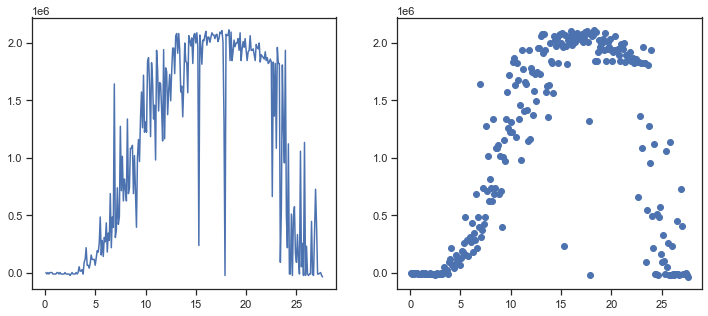

In [54]:
fig = plt.figure(figsize=(12,5))
axplot = fig.add_subplot(121)
axscat = fig.add_subplot(122)
axplot.plot(dataVP.vViento.iloc[idx_VVUniq],dataVP.Pw.iloc[idx_VVUniq])
axscat.scatter(dataVP.vViento.iloc[idx_VVUniq],dataVP.Pw.iloc[idx_VVUniq])

In [55]:
print('Numero de pares magnitud,potencia unicos %d'%(dataVP.iloc[idx_VVUniq].shape[0]))

Numero de pares magnitud,potencia unicos 274


In [56]:
#valores mayor a curva de potencia
nmayor= 0
nmenor =0
nigual=0
nigualred=0
#son menos valores, pues las velocidades de viento del fabricante van en intervalos de 0.5
for v in np.unique(dataVP.vViento[dataVP.vViento.isin(dfMfgCurve.index)].values):
    nmayor =nmayor+(dataVP[dataVP.vViento==v].Pw.values > dfMfgCurve.loc[v].values).sum()    
    nmenor =nmenor+(dataVP[dataVP.vViento==v].Pw.values < dfMfgCurve.loc[v].values).sum()    
    nigual =nigual+(dataVP[dataVP.vViento==v].Pw.values == dfMfgCurve.loc[v].values).sum()    
    #REDONDEO
    for r in [10,10000,100000,1000000]:
        nigualred =nigualred +((dataVP[dataVP.vViento==v].Pw.values/r).round()*r == dfMfgCurve.loc[v].values).sum()  
print('Número de valores arriba de la curva del fabricante: %d'%(nmayor) )
print('Número de valores abajo de la curva del fabricante: %d'%(nmenor) )
print('Número de valores iguales a la curva del fabricante: %d'%(nigual) )
print('Número de valores iguales a la curva del fabricante (redondeados): %d'%(nigualred) )

Número de valores arriba de la curva del fabricante: 1549
Número de valores abajo de la curva del fabricante: 4774
Número de valores iguales a la curva del fabricante: 0
Número de valores iguales a la curva del fabricante (redondeados): 3012


In [57]:
#redondear los datos de direccion y velocidad 
dataVDP_redond =dataVDP.round({'Dir': 0, 'vViento': 0})
#pares vviento Dir unicos
unique_rows = np.unique(dataVDP_redond[['vViento','Dir']], axis=0)
n =len(unique_rows)
print('Pares unicos direccion de viento y velocidad redondeados: %d '%(n))

Pares unicos direccion de viento y velocidad redondeados: 3615 


In [58]:
#combinaciones posibles de valores de vviento y direccion unicos
len(np.unique(dataVDP_redond.Dir.values))*len(np.unique(dataVDP_redond.vViento.values))

10440

# Filtrado,Clusters, regresion

## Resumen

- Eliminar datos con potencia cero (la maquina esta apagada y no es consecuencia de un estado de viento). O sí es consecuencia (video desplomenodir2).
- Eliminar puntos que aparententemente superen el limite de Betz(Rafaga oculta tras el promedio?)
- Eliminar valores negativos menores a -30kw


## Grupos sin filtrar

In [118]:
import importlib
importlib.reload(myfunc)

<module 'ipynb.fs.defs.my_funcs_clusters' (C:\Users\mungu\Documents\GitHub\aero\my_funcs_clusters.ipynb)>

In [139]:
#solo clusters sin subclusters
ncl = 5   # numero de clusters
nsubcl =3 #numero de subclusters
#subclusters
clsclord=('wind','pow') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.dataframe_to_cluster(
    dfVecVel,n_clusters=ncl,dfVP=dataVP,n_subclu =nsubcl,clusters_data=clsclord[0],subclusters_data=clsclord[1])


In [143]:

#############################################################
ploti = myfunc.PlotSubClusterInt()
ploti.create_plot(dfclvv,  figsize=(
    10, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids,fign=1003,
                  savepath='fig_art/', showlBetz=False, showMfgCurve= False, showCent= True, showOpt= 'Numero')

NameError: name 'C1' is not defined

In [140]:

###############################
ploti = myfunc.PlotSubClusterInt()
ploti.create_plot(dfclvv, dfclvp, dataVP, figsize=(
    10, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids,idx_centroids_sc=idx_centroids_sc,fign=100,
                savepath='fig_art/', showlBetz=False, showMfgCurve= False, showCent= True, showOpt= 'Numero', 
                dfMfgCurve=dfMfgCurve)

<IPython.core.display.Javascript object>

Saved in fig_art/VVVPCl5SCl3_.png


In [69]:
for i in range(len(cl_cent)):
    print(str(i+1) + ' - '+ str( np.sqrt( cl_cent[i][0]**2 + cl_cent[i][1]**2)) )

1 - 3.5411162026535785
2 - 13.327253931710448
3 - 1.4662656490182333
4 - 19.62057783736606
5 - 7.518181674216893


In [70]:
for i in range(len(cl_cent)):
    print(cl_cent[i][1]**2)

11.67672994569993
141.33279240613567
1.706404991792224
326.0670003515664
47.55673275053273


In [71]:
cl_cent

array([[ 0.92885629, -3.41712305],
       [-6.02352928, 11.88834692],
       [-0.66598045,  1.30629437],
       [-7.67463838, 18.05732539],
       [-2.9943819 ,  6.89613897]])

In [74]:
ncl = 25   # numero de clusters
nsubcl =0  #numero de subclusters
#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.cluster_to_dataframe(
    dfVecVel,  ncl,dataVP,n_subclu =nsubcl,clusters=clsclord[0],subclusters=clsclord[1])

Saved in VVVPCl25SCl0_.png


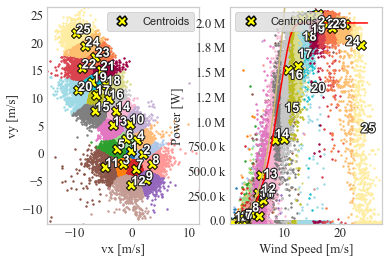

In [77]:
ploti = myfunc.PlotSubClusterInt()
ploti.create_plot(dfclvv, dfclvp, dataVP, figsize=(
    20, 10), cl_scl_order=clsclord, idx_centroids=idx_centroids,idx_centroids_sc=idx_centroids_sc,fign=93,
                dfMfgCurve=dfMfgCurve)

## Análisis grupo 11 Caída de potencia

### Ejemplo 1

In [78]:

# #video desplomedir_13
# #Creando un dataframe con el grupo 11
# dfg11 = dfclvp.C4.SC2.dropna()
# dfg11_DVP= dataDVP.loc[dfg11.index]
# dfg11_DVP= dataDVP.loc[pd.to_datetime('2016-10-30 02:00'):pd.to_datetime('2016-10-30 8:30')]
# formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009

# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True,figsize =(9,7))

# ax1.plot(dfg11_DVP.index,dfg11_DVP.vViento, linestyle='-', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax1.set_title('Velocidad de viento',fontsize=13)
# ax1.set_ylabel('Vel. [m/s]',fontsize=13)
# ax1.grid(b=True,which='both',axis='both')
# ax1.set_yticks(np.arange(0,20, 3))
# ax1.xaxis.set_minor_locator( mdates.MinuteLocator(interval = 10))
# ax1.xaxis.set_minor_formatter( mdates.DateFormatter('%H:%M'))
# ax1.tick_params(axis='y',   labelsize=12)

# ax2.plot(dfg11_DVP.index,dfg11_DVP.Dir, linestyle='-', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax2.set_title('Dirección de viento',fontsize=13)
# ax2.set_ylabel('Dir. [°]',fontsize=13)
# ax2.set_yticks(np.arange(0,61, 10))
# ax2.grid(b=True,which='both',axis='both')
# ax2.tick_params(axis='y',   labelsize=12)

# ax3.plot(dfg11_DVP.index,dfg11_DVP.Pw, linestyle='-', marker='o', color='b',linewidth=0.5,
#         markersize=2)

# ax3.set_title('Potencia',fontsize=13)
# ax3.yaxis.set_major_formatter(formatter1)
# ax3.set_xlabel('Estampa de tiempo',fontsize=13)
# ax3.set_ylabel('Pot. [W]',fontsize=13)
# ax3.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='minor',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)# labels along the bottom edge are off
# ax3.tick_params(axis='y',   labelsize=12)

# #buscando minimos para pintar líneas (VER BIEN LOS RANGOS DEL RANGE)
# vel =0
# direc = 0
# n=0
# for i in range(1,len(dfg11_DVP)) : #REVISARE ESTOS RANGOS PARA SABER SI SON FECHAS COMPLETAS
#     if  dfg11_DVP.iloc[[i]].Pw.values[0] <1e6: 
#         if dfg11_DVP.iloc[[i]].Pw.values[0] < dfg11_DVP.iloc[[i-1]].Pw.values[0]:
#             ax1.axvline(x= dfg11_DVP.iloc[[i]].index,linewidth = 1,linestyle='--',c='r')
#             ax2.axvline(x= dfg11_DVP.iloc[[i]].index,linewidth = 1,linestyle='--',c='r')
#             ax3.axvline(x= dfg11_DVP.iloc[[i]].index,linewidth = 1,linestyle='--',c='r')
#             print('mag:%0.1f,ang:%0.1f-%s'%(float(dfg11_DVP.iloc[[i]].vViento),
#                                       float(dfg11_DVP.iloc[[i]].Dir),str(dfg11_DVP.iloc[[i]].index.format())))
#             vel+=float(dfg11_DVP.iloc[[i]].vViento)
#             direc+=float(dfg11_DVP.iloc[[i]].Dir)
#             n+=1
# print('vel. prom: %0.1f,dir. prom:%0.1f'%(vel/n,direc/n))
#         #cuandos se recupera lap otencia despues de una caida"
# #     if (dfg11_DVP.loc[fechas[i]].Pw > dfg11_DVP.loc[fechas[i-1]].Pw) and (dfg11_DVP.loc[fechas[i]].Pw > dfg11_DVP.loc[fechas[i+1]].Pw):
# #             ax1.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
# #             ax2.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
# #             ax3.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
# plt.tight_layout()
# ax3.grid(b=True,which='both',axis='both')
# ax3.xaxis.set_major_locator(mdates.MinuteLocator(0))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# # ax3.xaxis.set_minor_locator( mdates.MinuteLocator(interval = 10))
# # ax3.xaxis.set_minor_formatter( mdates.DateFormatter('%H:%M'))

# plt.setp(ax3.get_xmajorticklabels(), visible=True, rotation=0)
# plt.ylim([-1e5,2e6])
# plt.yticks(np.arange(0, 2.1e6, 5e5))

# if flagsaveim:
#     plt.savefig('reporte/figuras/subpltg11.png')



### Ejemplo 2

In [79]:
# #Creando un dataframe con el grupo 11
# dfg11 = dfclvp.C4.SC2.dropna()
# dfg11_DVP= dataDVP.loc[dfg11.index]
# dfg11_DVP= dataDVP.loc[pd.to_datetime('2016-10-25 14:50'):pd.to_datetime('2016-10-26 10:10')]
# formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009

# plt.figure()

# plt.subplot(3, 1, 1)
# plt.plot(dfg11_DVP.index,dfg11_DVP.vViento, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax1=plt.gca()
# ax1.xaxis.set_major_locator(mdates.DayLocator(30))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 )
# ax1.set_title('Vel. de viento [m/s]')

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax1.xaxis.set_minor_locator(hours)
# ax1.xaxis.set_minor_formatter(h_fmt)

# plt.subplot(3, 1, 2)
# plt.plot(dfg11_DVP.index,dfg11_DVP.Dir, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax2=plt.gca()
# ax2.xaxis.set_major_locator(mdates.DayLocator(30))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax2.xaxis.get_majorticklabels(), rotation=0 )
# ax2.set_title('Dirección de viento')

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax2.xaxis.set_minor_locator(hours)
# ax2.xaxis.set_minor_formatter(h_fmt)

# plt.subplot(3, 1, 3)
# plt.plot(dfg11_DVP.index,dfg11_DVP.Pw, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax3=plt.gca()
# ax3.xaxis.set_major_locator(mdates.DayLocator(30))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax3.xaxis.get_majorticklabels(), rotation=0 )

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax3.xaxis.set_minor_locator(hours)
# ax3.xaxis.set_minor_formatter(h_fmt)
# ax3.set_title('Potencia [W]')
# ax3.yaxis.set_major_formatter(formatter1)

# plt.tight_layout()
# #buscando minimos para pintar líneas
# fechas = (dfg11_DVP[dfg11_DVP.Pw<=0.5e6].index)
# for i in range(1,len(fechas)) :
#     if dfg11_DVP.loc[fechas[i]].Pw < dfg11_DVP.loc[fechas[i-1]].Pw:
#         ax1.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
#         ax2.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
#         ax3.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
# plt.tight_layout()


###  Ejemplo 3

In [80]:
# #video desplomedir_13
# #Creando un dataframe con el grupo 11
# dfg11 = dfclvp.C4.SC2.dropna()
# dfg11_DVP= dataDVP.loc[dfg11.index]
# dfg11_DVP= dataDVP.loc[pd.to_datetime('2016-11-13 04:00'):pd.to_datetime('2016-11-13 16:10')]
# formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009

# plt.figure()

# plt.subplot(3, 1, 1)
# plt.plot(dfg11_DVP.index,dfg11_DVP.vViento, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax1=plt.gca()
# ax1.xaxis.set_major_locator(mdates.DayLocator(30))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 )
# ax1.set_title('Vel. de viento')
# ax1.set_ylabel('Vel. [m/s]')

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax1.xaxis.set_minor_locator(hours)
# ax1.xaxis.set_minor_formatter(h_fmt)

# plt.subplot(3, 1, 2)
# plt.plot(dfg11_DVP.index,dfg11_DVP.Dir, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax2=plt.gca()
# ax2.xaxis.set_major_locator(mdates.DayLocator(30))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax2.xaxis.get_majorticklabels(), rotation=0 )
# ax2.set_title('Dirección de viento')
# ax2.set_ylabel('Dir. [°]')

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax2.xaxis.set_minor_locator(hours)
# ax2.xaxis.set_minor_formatter(h_fmt)


# plt.subplot(3, 1, 3)
# plt.plot(dfg11_DVP.index,dfg11_DVP.Pw, linestyle='--', marker='o', color='b',linewidth=0.5,
#         markersize=2)
# ax3=plt.gca()
# ax3.xaxis.set_major_locator(mdates.DayLocator(30))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
# plt.setp( ax3.xaxis.get_majorticklabels(), rotation=0 )

# hours = mdates.HourLocator(interval = 5)  #
# h_fmt = mdates.DateFormatter('%H:%M')
# ax3.xaxis.set_minor_locator(hours)
# ax3.xaxis.set_minor_formatter(h_fmt)
# ax3.set_title('Potencia')
# ax3.yaxis.set_major_formatter(formatter1)
# ax3.set_xlabel('Estampa de tiempo')
# ax3.set_ylabel('Pot. [W]')

# #buscando minimos para pintar líneas (VER BIEN LOS RANGOS DEL RANGE)
# fechas = (dfg11_DVP[dfg11_DVP.Pw<=0.5e6].index)
# for i in range(1,len(fechas)-1) : #REVISARE ESTOS RANGOS PARA SABER SI SON FECHAS COMPLETAS
#     if dfg11_DVP.loc[fechas[i]].Pw < dfg11_DVP.loc[fechas[i-1]].Pw:
#         ax1.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
#         ax2.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
#         ax3.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='r')
#         #cuandos se recupera lap otencia despues de una caida"
#     if (dfg11_DVP.loc[fechas[i]].Pw > dfg11_DVP.loc[fechas[i-1]].Pw) and (dfg11_DVP.loc[fechas[i]].Pw > dfg11_DVP.loc[fechas[i+1]].Pw):
#             ax1.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
#             ax2.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
#             ax3.axvline(x=fechas[i],linewidth = 0.5,linestyle='--',c='g')
# plt.tight_layout()



### Ejemplo 4

###  Ejemplo 5


### pie grupo 11

### ¿Qué significan los diferentes valores de potencia negativos?

https://www.quora.com/How-much-power-does-a-wind-turbine-need-to-consume-to-start-working-and-to-operate
So there are some myths here about wind turbines. Small scale turbines may be self starting but big ones are not and will vampire off the grid until the winds are high enough to spin fast enough. (Roughly about 4 to 6 mph winds) they drain about 6kwh (6 kilo watts hours so 6 kilo watts per hour) while waiting this is used to run the controller, electronics and keep everything warmed up. Turbines seek the wind and as the wind picks up they will yaw to face the wind and jump up to about 9kwh tell it’s in the wind, usually takes less than a min. After the winds are high enough this where the major drain comes. It’s drain jumps up to about 24kwh, this is to charge the converters, capacitiers, pitch the blades to the correct angle to catch as much wind as needed to spin at the right rpm for the generator. After about a min it’ll do verification tests to make sure it’s good. That the energy being produced is at the right hertz and such. It’ll then push the power to the grid. So after a min it’ll go from -20kwh up to making 1000kwh and at peak capacity 2000kwh.

So basically a down turbine will consume about 150kwh on stand by in a day and to make up for it only needs to run for much less than an hour.

Se supone que:
- cuando la potencia es cero, la turbina está completamente apagada o hay un problema del sensor, pero se pensaría que las filas en blanco son problemas del sensor.
- Una potencia espara mantener activos los sistemas.
- Una potencia es para arrancar.

## Filtrado

In [81]:
#calculo de la potencia maxima  a partir del limite de betz
A=np.pi*45**2
Cp = 0.59 #limite de Betz
rho = 1.1349
vvento = np.unique(dataVP.vViento.values)
PMaxViento = 1/2*rho*A*vvento**3*Cp


In [82]:
#eliminando valores que superen el limite de betz
dataVP_filt = dataVP.copy()#copia de dataVP hecha para eliminar valores que superen el limited betz
dfVecVel_filt = dfVecVel.copy()
for i in range(len(vvento)):
    idxd =dataVP[(dataVP.vViento==vvento[i])&(dataVP.Pw>PMaxViento[i])].index
    dataVP_filt.drop(idxd,inplace=True)
    dfVecVel_filt.drop(idxd,inplace=True)

In [83]:
# #eliminando valores de potencia negativos menores a 30kW
mask = dataVP[dataVP.Pw<-30E3].index
dataVP_filt.drop(mask,inplace=True)
dfVecVel_filt.drop(mask,inplace=True)


In [84]:
# # #eliminando potencias igual a cero
# mask = dataVP[dataVP.Pw==0].index
# dataVP_filt.drop(mask,inplace=True)
# dfVecVel_filt.drop(mask,inplace=True)

In [85]:
# NO VALE LA PENA FILTRAR ASI, SON POCOS PUNTOS Y NO MEJORAN LA POSICION DE LOS CENTROIDES
# secuencia de potencias cero 
# start_remove = pd.to_datetime('2016-05-23 23:00:00')
# end_remove=pd.to_datetime('2016-05-24 11:50:00')
# dataVP_filt=dataVP.loc[(dataVP.index < start_remove) | (dataVP.index > end_remove)]
# dfVecVel_filt=dfVecVel.loc[(dfVecVel.index < start_remove) | (dfVecVel.index > end_remove)]
# start_remove = pd.to_datetime('2016-09-02 8:00:00')
# end_remove=pd.to_datetime('2016-09-03 11:00:00')
# dataVP_filt=dataVP.loc[(dataVP.index < start_remove) | (dataVP.index > end_remove)]
# dfVecVel_filt=dfVecVel.loc[(dfVecVel.index < start_remove) | (dfVecVel.index > end_remove)]
# start_remove = pd.to_datetime('2016-10-13 12:10:00')
# end_remove=pd.to_datetime('2016-10-13 15:20:00')
# dataVP_filt=dataVP.loc[(dataVP.index < start_remove) | (dataVP.index > end_remove)]
# dfVecVel_filt=dfVecVel.loc[(dfVecVel.index < start_remove) | (dfVecVel.index > end_remove)]


## Clusters

In [86]:
dfVecVel_filt

,vx,vy
PCTimeStamp,,
2016-01-01 00:00:00,-6.273062,11.042586
2016-01-01 00:10:00,-7.688883,12.645991
2016-01-01 00:20:00,-7.076189,14.572836
2016-01-01 00:30:00,-6.012825,13.632899
2016-01-01 00:40:00,-6.692292,14.753075
...,...,...
2017-01-01 23:00:00,-0.130661,0.789258
2017-01-01 23:10:00,-0.262189,0.965016
2017-01-01 23:20:00,-0.505243,1.088453


In [90]:
#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv, dfclpw, dfclvp, cl_ord,cl_cent,idx_centroids,scl_ord,scl_cent,idx_centroids_sc = myfunc.cluster_to_dataframe(
    dfVecVel_filt, 5 ,dataVP_filt,n_subclu = 3 ,clusters=clsclord[0],subclusters=clsclord[1])


In [115]:
dataVP_filt

,vViento,Pw
PCTimeStamp,,
2016-01-01 00:00:00,12.7,1.953050e+06
2016-01-01 00:10:00,14.8,2.067561e+06
2016-01-01 00:20:00,16.2,2.048475e+06
2016-01-01 00:30:00,14.9,2.080284e+06
2016-01-01 00:40:00,16.2,2.073922e+06
...,...,...
2017-01-01 23:00:00,0.8,0.000000e+00
2017-01-01 23:10:00,1.0,-1.272345e+04
2017-01-01 23:20:00,1.2,-1.272345e+04


Saved in VVVPCl5SCl3_.png


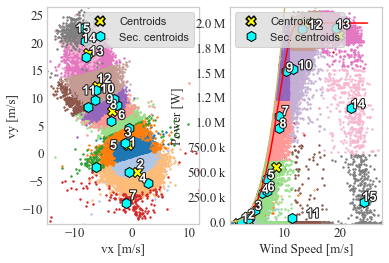

In [94]:
ploti_filt = myfunc.PlotSubClusterInt()
ploti_filt.create_plot(dfclvv, dfclvp, dataVP, figsize=(
    7, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids,idx_centroids_sc=idx_centroids_sc,fign=92,
                     dfMfgCurve=dfMfgCurve)

## Filtrando por estados (clusters)

Se quitan los estados no productores de potencia excluyendo el estado 0 (velocidades cercanas a 0)

In [109]:
cl_borrar = [('C1', 'SC3'), ('C2', 'SC3'), ('C4', 'SC1'),('C4', 'SC2'),('C5', 'SC2'),('C5', 'SC3')] #5cl y 3 scl
#[3,6,10,11,14,15]
#cl_borrar=[('C1','SC1'),('C1','SC2'),('C1','SC3'),('C2','SC1'),('C2','SC2'),('C2','SC3')]
dfs, idx_centroids_clean,idx_centroids_sc_clean = myfunc.del_clusters(
    [dfclvv, dfclvp], cl_borrar, idx_centroids,idx_centroids_sc, cl_type='cluster')
dvv = dfs[0]
dvp = dfs[1]


In [112]:
dfclvv

C1                                              C2                \
            SC1                 SC2           SC3           SC1           SC2   
             vx        vy        vx        vy  vx  vy        vx        vy  vx   
0           NaN       NaN -1.344599  4.815813 NaN NaN  1.907173 -1.096673 NaN   
1           NaN       NaN -1.285875  4.103233 NaN NaN  0.984094 -0.849447 NaN   
2     -1.105671  4.155417       NaN       NaN NaN NaN  2.126456 -0.876462 NaN   
3     -1.204570  2.304129       NaN       NaN NaN NaN  0.492535 -0.983570 NaN   
4     -1.381636  2.202517       NaN       NaN NaN NaN  2.119553 -3.969571 NaN   
...         ...       ...       ...       ...  ..  ..       ...       ...  ..   
16365 -0.130661  0.789258       NaN       NaN NaN NaN       NaN       NaN NaN   
16366 -0.262189  0.965016       NaN       NaN NaN NaN       NaN       NaN NaN   
16367 -0.505243  1.088453       NaN       NaN NaN NaN       NaN       NaN NaN   
16368 -0.359940  1.039444       NaN       NaN NaN NaN       NaN       NaN NaN   
16369  0.015706  0.599794       NaN       NaN NaN NaN       NaN       NaN NaN   

           ...  C4                                 C5                         \
           ... SC2           SC3                  SC1            SC2     SC3   
       vy  ...  vx  vy        vx         vy        vx         vy  vx  vy  vx   
0     NaN  ... NaN NaN -6.273062  11.042586 -5.903030  15.621915 NaN NaN NaN   
1     NaN  ... NaN NaN -7.688883  12.645991 -6.898359  15.865139 NaN NaN NaN   
2     NaN  ... NaN NaN -7.076189  14.572836 -5.459186  15.676648 NaN NaN NaN   
3     NaN  ... NaN NaN -6.012825  13.632899 -5.642789  16.670901 NaN NaN NaN   
4     NaN  ... NaN NaN -6.692292  14.753075 -5.854528  16.172956 NaN NaN NaN   
...    ..  ...  ..  ..       ...        ...       ...        ...  ..  ..  ..   
16365 NaN  ... NaN NaN       NaN        NaN       NaN        NaN NaN NaN NaN   
16366 NaN  ... NaN NaN       NaN        NaN       NaN        NaN NaN NaN NaN   
16367 NaN  ... NaN NaN       NaN        NaN       NaN        NaN NaN NaN NaN   
16368 NaN  ... NaN NaN       NaN        NaN       NaN        NaN NaN NaN NaN   
16369 NaN  ... NaN NaN       NaN        NaN       NaN        NaN NaN NaN NaN   

           
           
       vy  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
...    ..  
16365 NaN  
16366 NaN  
16367 NaN  
16368 NaN  
16369 NaN  

[16370 rows x 30 columns]

In [111]:
print(len(dvv))
print(len(dvp))

16370
50150


Saved in fig_art/VVVPCl5SCl3_.png


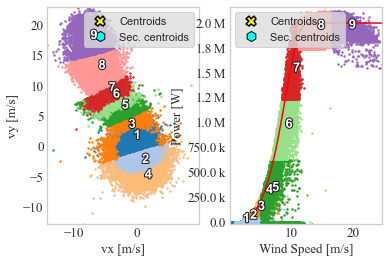

In [98]:
ploti_filt_2 = myfunc.PlotSubClusterInt()
ploti_filt_2.create_plot(dvv, dvp, dataVP, figsize=(
    7, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids_clean,idx_centroids_sc=idx_centroids_sc_clean,fign=85,
                        savepath='fig_art/', showlBetz=False, showCent= False, showOpt= 'Numero',
                       dfMfgCurve=dfMfgCurve)



## Pasar de dataframe con clusters a dataframe normal

In [99]:
dvp

C1                                C2                  \
                        SC1                   SC2         SC1         SC2       
                    vViento            Pw vViento  Pw vViento  Pw vViento  Pw   
2016-01-01 00:00:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:10:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:20:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:30:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
2016-01-01 00:40:00     NaN           NaN     NaN NaN     NaN NaN     NaN NaN   
...                     ...           ...     ...  ..     ...  ..     ...  ..   
2017-01-01 23:00:00     0.8      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:10:00     1.0 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:20:00     1.2 -12723.450247     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:30:00     1.1      0.000000     NaN NaN     NaN NaN     NaN NaN   
2017-01-01 23:40:00     0.6 -12723.450247     NaN NaN     NaN NaN     NaN NaN   

                         C3                                  C4                \
                        SC1         SC2         SC3         SC3                 
                    vViento  Pw vViento  Pw vViento  Pw vViento            Pw   
2016-01-01 00:00:00     NaN NaN     NaN NaN     NaN NaN    12.7  1.953050e+06   
2016-01-01 00:10:00     NaN NaN     NaN NaN     NaN NaN    14.8  2.067561e+06   
2016-01-01 00:20:00     NaN NaN     NaN NaN     NaN NaN    16.2  2.048475e+06   
2016-01-01 00:30:00     NaN NaN     NaN NaN     NaN NaN    14.9  2.080284e+06   
2016-01-01 00:40:00     NaN NaN     NaN NaN     NaN NaN    16.2  2.073922e+06   
...                     ...  ..     ...  ..     ...  ..     ...           ...   
2017-01-01 23:00:00     NaN NaN     NaN NaN     NaN NaN     NaN           NaN   
2017-01-01 23:10:00     NaN NaN     NaN NaN     NaN NaN     NaN           NaN   
2017-01-01 23:20:00     NaN NaN     NaN NaN     NaN NaN     NaN           NaN   
2017-01-01 23:30:00     NaN NaN     NaN NaN     NaN NaN     NaN           NaN   
2017-01-01 23:40:00     NaN NaN     NaN NaN     NaN NaN     NaN           NaN   

                         C5      
                        SC1      
                    vViento  Pw  
2016-01-01 00:00:00     NaN NaN  
2016-01-01 00:10:00     NaN NaN  
2016-01-01 00:20:00     NaN NaN  
2016-01-01 00:30:00     NaN NaN  
2016-01-01 00:40:00     NaN NaN  
...                     ...  ..  
2017-01-01 23:00:00     NaN NaN  
2017-01-01 23:10:00     NaN NaN  
2017-01-01 23:20:00     NaN NaN  
2017-01-01 23:30:00     NaN NaN  
2017-01-01 23:40:00     NaN NaN  

[50150 rows x 18 columns]

In [100]:
dvv

C1                                      C2                    C3  \
            SC1                 SC2                 SC1           SC2     SC1   
             vx        vy        vx        vy        vx        vy  vx  vy  vx   
0           NaN       NaN -1.344599  4.815813  1.907173 -1.096673 NaN NaN NaN   
1           NaN       NaN -1.285875  4.103233  0.984094 -0.849447 NaN NaN NaN   
2     -1.105671  4.155417       NaN       NaN  2.126456 -0.876462 NaN NaN NaN   
3     -1.204570  2.304129       NaN       NaN  0.492535 -0.983570 NaN NaN NaN   
4     -1.381636  2.202517       NaN       NaN  2.119553 -3.969571 NaN NaN NaN   
...         ...       ...       ...       ...       ...       ...  ..  ..  ..   
16365 -0.130661  0.789258       NaN       NaN       NaN       NaN NaN NaN NaN   
16366 -0.262189  0.965016       NaN       NaN       NaN       NaN NaN NaN NaN   
16367 -0.505243  1.088453       NaN       NaN       NaN       NaN NaN NaN NaN   
16368 -0.359940  1.039444       NaN       NaN       NaN       NaN NaN NaN NaN   
16369  0.015706  0.599794       NaN       NaN       NaN       NaN NaN NaN NaN   

                                             C4                   C5  \
          SC2           SC3                 SC3                  SC1   
       vy  vx  vy        vx        vy        vx         vy        vx   
0     NaN NaN NaN -2.708672  9.833773 -6.273062  11.042586 -5.903030   
1     NaN NaN NaN -5.760295  7.928367 -7.688883  12.645991 -6.898359   
2     NaN NaN NaN -5.929446  9.026720 -7.076189  14.572836 -5.459186   
3     NaN NaN NaN -6.186157  8.360111 -6.012825  13.632899 -5.642789   
4     NaN NaN NaN -5.792245  9.233629 -6.692292  14.753075 -5.854528   
...    ..  ..  ..       ...       ...       ...        ...       ...   
16365 NaN NaN NaN       NaN       NaN       NaN        NaN       NaN   
16366 NaN NaN NaN       NaN       NaN       NaN        NaN       NaN   
16367 NaN NaN NaN       NaN       NaN       NaN        NaN       NaN   
16368 NaN NaN NaN       NaN       NaN       NaN        NaN       NaN   
16369 NaN NaN NaN       NaN       NaN       NaN        NaN       NaN   

                  
                  
              vy  
0      15.621915  
1      15.865139  
2      15.676648  
3      16.670901  
4      16.172956  
...          ...  
16365        NaN  
16366        NaN  
16367        NaN  
16368        NaN  
16369        NaN  

[16370 rows x 18 columns]

In [ ]:
import importlib
importlib.reload(myfunc)

In [108]:
def clust2data(dfv,dfvp):
    '''
    Convierte el dataframe de los datos de vx,vy y potencia separados en clusters (C1-SC1-vx,vy) a datos con
    con tres columnas time,vx,vy o time,vv,pw.
    To-do:   Sigue perdiendo miles de registros, ¿porque hay registros na en el original?
    hay filas con solo nan en el original, en una prueba fueron como 4000'''
    dfv= dfv.copy()#para que no afecte el original, si lo afecta el que esta como argumento
    dfvp= dfvp.copy()
    #Quitar multiindex
    dfv.columns = dfv.columns.map(''.join)
    dfv.reset_index(inplace=True)
    #list comprehension
    lvv=[
        dfv.iloc[i].dropna().values
        for i in range(len(dfv) )
    ]
    dfvxvy_clean=pd.DataFrame(lvv,columns=['PCTimeStamp','vx','vy'])
    dfvxvy_clean.dropna(inplace=True)#hay filas de nan y se pierden miles de datos, revisar

    #Quitar multiindex
    dfvp.columns = dfvp.columns.map(''.join)
    dfvp.reset_index(inplace=True)
    #list comprehension
    lvp=[
        dfvp.iloc[i].dropna().values
        for i in range(len(dfvp) )
    ]
    dfvp_clean=pd.DataFrame(lvp,columns=['PCTimeStamp','vViento','Pw'])
    dfvp_clean.dropna(inplace=True)#hay filas de nan y se pierden miles de datos, revisar

    return dfvxvy_clean,dfvp_clean
# dfVecVel_NCl: datos filtrados y sin clusters pasados a datos normales
dfVecVel_NCl,dataVP_NCl = clust2data(dvv,dvp)

ValueError: 3 columns passed, passed data had 11 columns

In [103]:
def clust_to_data(dfv,dfvp):
    """
    Convierte el dataframe de los datos de vx,vy y potencia separados en clusters (C1-SC1-vx,vy) a datos con
    con tres columnas time,vx,vy o time,vv,pw.
    To-do:   Sigue perdiendo miles de registros, ¿porque hay registros na en el original?
    hay filas con solo nan en el original, en una prueba fueron como 4000"""
    dfv= dfv.copy()#para que no afecte el original, si lo afecta el que esta como argumento
    dfvp= dfvp.copy()
    #Quitar multiindex
    dfv.columns = dfv.columns.map(''.join)
    dfv.reset_index(inplace=True)
    #list comprehension
    lvv=[
        dfv.iloc[i].dropna().values
        for i in range(len(dfv) )
    ]
    dfvxvy_clean=pd.DataFrame(lvv,columns=['PCTimeStamp','vx','vy'])
    dfvxvy_clean.dropna(inplace=True)#hay filas de nan y se pierden miles de datos, revisar

    #Quitar multiindex
    dfvp.columns = dfvp.columns.map(''.join)
    dfvp.reset_index(inplace=True)
    #list comprehension
    lvp=[
        dfvp.iloc[i].dropna().values
        for i in range(len(dfvp) )
    ]
    dfvp_clean=pd.DataFrame(lvp,columns=['PCTimeStamp','vViento','Pw'])
    dfvp_clean.dropna(inplace=True)#hay filas de nan y se pierden miles de datos, revisar

    return dfvxvy_clean,dfvp_clean
# dfVecVel_NCl: datos filtrados y sin clusters pasados a datos normales
dfVecVel_NCl,dataVP_NCl = clust_to_data(dvv,dvp)

ValueError: 3 columns passed, passed data had 11 columns

In [101]:
# dfVecVel_NCl: datos filtrados y sin clusters pasados a datos normales
dfVecVel_NCl,dataVP_NCl = clust_to_data(dvv,dvp)

ValueError: 3 columns passed, passed data had 11 columns

In [ ]:
plt.figure(94)
a =plt.scatter(dataVP_NCl.vViento,dataVP_NCl.Pw,s=1)
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
ax1=plt.gca()
ax1.set_ylabel('Potencia [W]')
ax1.set_xlabel('Vel. de viento [m/s]')
ax1.yaxis.set_major_formatter(formatter1)
if flagsaveim:
    plt.savefig('reporte/figuras/curvpotrec.png')


## Desviaciones estandar de los datos filtrados (bins=0.5m/s)

In [ ]:
#bins = np.arange(0,28,0.5)
#lp=[]
#for i in range(len(bins)-1):
#    lp.append(dataVP[(dataVP.vViento>=bins[i]) & (dataVP.vViento<=bins[i+1])].Pw.std())
#plt.figure(94)
#plt.bar(bins[:-1],lp,0.5,edgecolor ='k',label='Sin filtrar')
##datos filtrados
#df= dfcltodf.dropna()
#bins = np.arange(0,28,0.5)
#lp=[]
#for i in range(len(bins)-1):
#    lp.append(df[(df.vViento>=bins[i]) & (df.vViento<=bins[i+1])].Pw.std())
#plt.bar(bins[:-1],lp,0.5,edgecolor ='k',label='Filtrado')
#plt.title("Desviaciones estandar")
#plt.xlabel('Viento')
#plt.ylabel('Potencia')
#plt.legend()
#plt.show()
#print('Velocidad maxima en datos filtrados: %0.1f m/s'%df.vViento.max().max())

# Comparacion entre funciones de ajuste

##  Regresion por numpy (poly)
- Tiene potencias negativas para velocidades bajas



In [ ]:
np.version.version


In [ ]:
enerDatos=dataVP.Pw.sum()*1/6#deltat
#lo que hace esta celda es redondear las velocidades de viento a en intervalos de 0.5 para buscarlas en el dataframe 
#de la curva del fabricante para sumar las potencias de las velocidades d
#redondear
vViento_red =np.around(dataVP.vViento.values*2)/2
#quitando valores menores a 4 y mayores a 25
vViento_filt = vViento_red[(vViento_red >= 4) &(vViento_red <= 25)]
pwcpotfab = 0
for i in vViento_filt:
    pwcpotfab = pwcpotfab+ dfMfgCurve.loc[i].pw
enerpotfab = pwcpotfab*1/6


In [ ]:

#inicio
#Hacer una lista de centroides de subclusters
vviento = np.arange(0, 28, 0.1)

lcent=[]
for i in range(len(idx_centroids_sc_clean)):
    lcent.append([idx_centroids_sc_clean.iloc[i].vViento,idx_centroids_sc_clean.iloc[i].Pw])
lcent= np.array(lcent)
#ordenando centroides
lcent= lcent[lcent[:,0].argsort()]

In [ ]:
xp = vviento.copy()
x =  lcent[:,0]
y = lcent[:,1]
z = np.polyfit(x, y, 3)
polyf = np.poly1d(z)
x_data=lcent[:,0]
y_data=lcent[:,1]
z
y_pred_poly= polyf(x) #predictec
y_pred_poly_vv =  polyf(xp)

In [ ]:
plt.figure(95)
xp = vviento
_ = plt.plot(x, y, '.', xp, polyf(xp), '-')
plt.ylim(-4E5,2.5E6)

plt.show()

In [ ]:
residuals_poly = y- y_pred_poly
ss_res = np.sum(residuals_poly**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_poly = 1 - (ss_res / ss_tot)
meanAbsErr_poly = sk.metrics.mean_absolute_error(y,polyf(x))
rmse_poly = np.sqrt(((y - y_pred_poly) ** 2).mean())
for i in range(len(residuals_poly)):
    print('Residual %i: %0.4f'%(i+1,residuals_poly[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_poly)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_poly)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_poly)

In [ ]:
residuals_poly

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

potPoly = np.sum(polyf(dataVP.vViento))
enerPoly =potPoly*deltaT
difPctPoly = ((enerPoly-enerDatos)*100)/enerDatos
difPctPoly_fab =  ((enerPoly-enerpotfab)*100)/enerpotfab


## Expresion algebraica  
$$f(v) = A(1-e^{-b(v)^{n}})$$
$$f(v) = A((1+y_s)-e^{-b(v-x_s)^{n}})$$



### Ajuste (Cambié  los parametros de optimización que me da un mejor ajuste)

In [ ]:
#Hacer una lista de centroides de subclusters
lcent=[]
for i in range(len(idx_centroids_sc_clean)):
    lcent.append([idx_centroids_sc_clean.iloc[i].vViento,idx_centroids_sc_clean.iloc[i].Pw])
lcent= np.array(lcent)
#ordenando centroides
lcent= lcent[lcent[:,0].argsort()]

#calculo de parametros
x_data = lcent[:,0]
y_data =lcent[:,1]

def test_func(vviento, b, xs,ys,A):
    n=4
    return A*((1.0+ys)-np.exp(-b * (vviento-xs)**n))

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[0.0001, 0.001,0,1.8e6],
                                               bounds=((-np.inf,-np.inf,-np.inf,1.7e6),(np.inf,np.inf,np.inf,2.0e6))                                              )


n=4
b= params[0]
xs= params[1]
ys= params[2]
A = params[3]

formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009

p =plt.figure(300,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_alg_vv=A*((1.0+ys)-np.exp(-b * (vviento-xs)**n))# xshift yshift

plt.plot(vviento, y_pred_alg_vv,linestyle='-',label='Propuesta')
ax1 = plt.gca()
ax1.yaxis.set_major_formatter(formatter1)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x',label='Centros')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r',linestyle='-',label='Fabricante')
plt.ylabel('Potencia [W]',fontsize=12)
plt.xlabel('Vel. de viento [m/s]',fontsize=12)
plt.ylim(-1E5, 2.1E6)
#texto parametros

# plt.text(20,100E4,'b = %.4f'%b,size='large')
# plt.text(20,80E4,'n = %.4f'%n,size='large')
# plt.text(20,60E4,'xs = %.4f'%xs,size='large')
# plt.text(20,40E4,'ys = %.4f'%ys ,size='large')
# plt.text(20,20E4,'A = {:,}'.format( A),size='large')

#texto latex
# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if not exponent:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if not precision:
        precision = decimal_digits

    return r"${0:.{2}f}x10^{{{1:d}}}$".format(coeff, exponent, precision)
Asci = sci_notation(A,decimal_digits=3)[1:-1] #quito $ y me quedo solo con el string
yssci = sci_notation(ys)[1:-1]
bssci = sci_notation(b)[1:-1]

plt.text(10, 1e6, r'$P(v) = %s \left \{(1+%s)-e^{-%s( v-%s)^{%s}} \right \}$'
         %(Asci,yssci,bssci,'%.2f'%(xs),str(n)) ,fontsize=12)

#limix = range(31)
#plt.xticks(limix)
plt.tick_params(labelsize=12)
plt.legend()
plt.legend(fontsize=12)


plt.show()
y_pred_alg =test_func(x_data, params[0],params[1],params[2],params[3])
# if flagsaveim:
#     plt.savefig('reporte/figuras/curvaAjustada.png')
# plt.savefig('reporte/figuras/curvaAjustada.png')
print(params)


In [ ]:
residuals_alg = y_data- y_pred_alg
ss_res = np.sum(residuals_alg**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_alg = 1 - (ss_res / ss_tot)
meanAbsErr_alg= sk.metrics.mean_absolute_error(y_data,y_pred_alg)
rmse_alg = np.sqrt(((y_data - y_pred_alg) ** 2).mean())
for i in range(len(residuals_alg)):
    print('Residual %i: %0.4f'%(i+1,residuals_alg[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_alg)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_alg)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_alg)

In [ ]:
#plot der esiduals
plt.figure(99)
plt.scatter(x_data,residuals_alg)
plt.title('Plot de residuals')
plt.show()

### Calculo de potencia

In [ ]:
#grupos filtrados
deltaT = 1/6 #10 minutos es un sexto de hora
dfg11 = dfclvp.C4.SC2.dropna()
dfg14 = dfclvp.C5.SC2.dropna()
dfg15 = dfclvp.C5.SC3.dropna()
dfg3 = dfclvp.C1.SC3.dropna()
dfg6 = dfclvp.C2.SC3.dropna()
dfg10 = dfclvp.C4.SC1.dropna()
potgruposfilt  =dfg11.Pw.sum()+dfg14.Pw.sum()+dfg15.Pw.sum() +dfg3.Pw.sum() +dfg6.Pw.sum() +dfg10.Pw.sum() 
potgruposNoprodpot= dfg11.Pw.sum()+dfg14.Pw.sum()+dfg15.Pw.sum()
potTotExpAlg=0
for vv in dataVP.vViento.values:
    potTotExpAlg+= A*((1.0+ys)-np.exp(-b * (vv-xs)**n))
potExpAlg =potTotExpAlg.copy()
enerExpAlg=potTotExpAlg*deltaT
enerDatos=dataVP.Pw.sum()*deltaT
difPctExpAlg = ((enerExpAlg-enerDatos)*100)/enerDatos

difPctExpAlg_fab = ((enerExpAlg-enerpotfab)*100)/enerpotfab


print('Potencia total con la expresión algebraica: %0.4f MW'%(potTotExpAlg/1e6))
print('Potencia total sumando los datos reales: %0.4f MW'%(dataVP.Pw.sum()/1e6))
print('Energía total con la expresión algebraica: %0.4f MWh'%(potTotExpAlg*deltaT/1e6))
print('Energía total sumando los datos reales: %0.4f MWh'%(dataVP.Pw.sum()*deltaT/1e6))
print('Diferencia en porcentaje [pot]: %0.2f%%' % (((potTotExpAlg-dataVP.Pw.sum())*100)/dataVP.Pw.sum()))
print('Diferencia en porcentaje [Ene]: %0.2f%%' % (difPctExpAlg))
print('Porcentaje de potencia del grupo 3,6,10,11,14 y 15: %0.2f%%'%((potgruposfilt*100)/dataVP.Pw.sum()) )
print('Porcentaje de potencia del grupo 11,14 y 15: %0.2f%%'%((potgruposNoprodpot*100)/dataVP.Pw.sum()) )
print('Potencia del grupo 11,14 y 15: %0.2f MW'%(potgruposNoprodpot/1e6))
print('Potencia del grupo 3,6,10,11,14 y 15: %0.2f MW'%(potgruposfilt/1e6))
print('Energía del grupo 11,14 y 15: %0.2f MWh'%(potgruposNoprodpot*deltaT/1e6))
print('Energía del grupo 3,6,10,11,14 y 15: %0.2f MWh'%(potgruposfilt*deltaT/1e6))
print('Diferencia entre la potencia producida menos la potencia calculada: %0.4f MW'%((dataVP.Pw.sum()- potTotExpAlg)/1e6))
print('Diferencia entre la energía producida menos la energía calculada: %0.4f MWh'%((dataVP.Pw.sum()- potTotExpAlg)*deltaT/1e6))

##  5 parameters logistic 5PL

$$
P = D+\frac{A-D}{\left(1+(v/C)^B\right)^G}
$$
A = minimum asymptote<br>
B = Hill slope<br>
C = inflection point (point of curve where the curvature changes direction)<br>
D = maximum asymptote<br>
G = asymmetry factor(parameters obtained by evolutionary techniques)<br>

In [ ]:
from scipy import optimize
x_data = lcent[:,0]
y_data =lcent[:,1]

def logistic5(x, B, C, G):
    """5PL lgoistic equation."""
    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    A = yoff #A  is the minimum asymptote
    D = 2E6 #D  is the maximum asymptote.
    return ((A-D)/(1.0+((x/C)**B))**G) + D 

#B= 5.000000 , C=11.722000, G=2.900000 calculado con gridsearch
# params, params_covariance = optimize.curve_fit(logistic5, x_data, y_data,
#                                                p0=[5,11,2],bounds=((5,11,2),(6,12,5)))
params, params_covariance = optimize.curve_fit(logistic5, x_data, y_data,                                               p0=[5,11,2],
                                                bounds=((-np.inf,-np.inf,-np.inf),(np.inf,np.inf,np.inf))                                              )



print(params)
yoff =-1.27234502e+04 #potencia cuando elv iento es cero
A_5PL = yoff #A  is the minimum asymptote
D_5PL = 2E6 #D  is the maximum asymptote.

B_5PL= params[0]
C_5PL= params[1]
G_5PL= params[2]
residuals = y_data- logistic5(x_data, params[0],params[1],params[2])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_logi5 = 1 - (ss_res / ss_tot)
print('Coefficient of determination R^2: %0.5f'%r_squared_logi5)
p =plt.figure(109,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_logi5_vv= logistic5(vviento, B_5PL, C_5PL,G_5PL)
y_pred_logi5= logistic5(x_data, B_5PL, C_5PL,G_5PL)
plt.plot(vviento, y_pred_logi5_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'A = ' + str(A_5PL),size='x-large')
plt.text(20,80E4,'B= ' + str(B_5PL),size='x-large')
plt.text(20,60E4,'C= ' + str(C_5PL),size='x-large')
plt.text(20,40E4,'D= ' + str(D_5PL),size='x-large')
plt.text(20,20E4,'G= ' + str(G_5PL),size='x-large')
plt.show()



In [ ]:
residuals_logi5 = y_data-y_pred_logi5
ss_res = np.sum(residuals_logi5**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_logi5 = 1 - (ss_res / ss_tot)
meanAbsErr_logi5 = sk.metrics.mean_absolute_error(y_data,y_pred_logi5 )
rmse_logi5 = np.sqrt(((y_data - y_pred_logi5) ** 2).mean())
for i in range(len(residuals_logi5)):
    print('Residual %i: %0.4f'%(i+1,residuals_logi5[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_logi5)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_logi5)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_logi5)

In [ ]:
len(x_data)

In [ ]:
len(residuals_logi5)

In [ ]:
#error raro si no le pongo inline y lo dejo interactivo
%matplotlib inline
#plot der esiduals
plt.figure(110)
plt.scatter(x_data,residuals_logi5)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

pot5PL = np.sum( logistic5(dataVP.vViento, B_5PL, C_5PL,G_5PL))
ener5PL =pot5PL*deltaT
difPct5PL = ((ener5PL-enerDatos)*100)/enerDatos

difPct5PL_fab = ((ener5PL-enerpotfab)*100)/enerpotfab


## 4 parameter logistic (4PL)
$$
P = D+\frac{A-D}{1+(v/C)^B}
$$
A = minimum asymptote<br>
B = Hill slope<br>
C = inflection point (point of curve where the curvature changes direction)<br>
D = maximum asymptote<br>


In [ ]:
x_data = lcent[:,0]
y_data =lcent[:,1]

def logistic4(x, B, C):
    """4PL lgoistic equation."""
    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    A = yoff #A  is the minimum asymptote
    D = 2E6 #D  is the maximum asymptote.

    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    return ((A-D)/(1.0+((x/C)**B))) + D 


params, params_covariance = optimize.curve_fit(logistic4, x_data, y_data,
                                               p0=[5,8 ],bounds=((5,8),(10,10)))

print(params)
A_4PL = yoff #A  is the minimum asymptote
D_4PL = 2E6 #D  is the maximum asymptote.

B_4PL= params[0]
C_4PL= params[1]

p =plt.figure(106,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_logi4_vv= logistic4(vviento, B_4PL, C_4PL)
y_pred_logi4= logistic4(x_data, B_4PL, C_4PL)
plt.plot(vviento, y_pred_logi4_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'A = ' + str(A_4PL),size='x-large')
plt.text(20,80E4,'B= ' + str(B_4PL),size='x-large')
plt.text(20,60E4,'C= ' + str(C_4PL),size='x-large')
plt.text(20,40E4,'D= ' + str(D_4PL),size='x-large')
plt.show()


In [ ]:
residuals_logi4 = y_data-y_pred_logi4
ss_res = np.sum(residuals_logi4**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_logi4 = 1 - (ss_res / ss_tot)
meanAbsErr_logi4 = sk.metrics.mean_absolute_error(y_data,y_pred_logi4 )
rmse_logi4 = np.sqrt(((y_data - y_pred_logi4) ** 2).mean())
for i in range(len(residuals_logi4)):
    print('Residual %i: %0.4f'%(i+1,residuals_logi4[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_logi4)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_logi4)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_logi4)

In [ ]:
#plot de residuals
plt.figure(107)
plt.scatter(x_data,residuals_logi4)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

pot4PL = np.sum( logistic4(dataVP.vViento, B_4PL, C_4PL))
ener4PL =pot4PL*deltaT
difPct4PL = ((ener4PL-enerDatos)*100)/enerDatos
difPct4PL_fab = ((ener4PL-enerpotfab)*100)/enerpotfab



## Smoothing spline


In [ ]:
ys

In [ ]:
plt.figure(108)
from numpy import linspace,exp
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = lcent[:,0]#lista de centroides limpios
y = lcent[:,1]
s = UnivariateSpline(x, y,s=1,k=3)
xs = vviento
ys = s(xs)

plt.plot(x, y, '.')
plt.plot(xs, ys,c='y')
plt.ylim(-300000,2.5E6)
plt.show()

y_pred_smooSpline=s(x_data)
y_pred_smooSpline_vv =s(xs)

In [ ]:
residuals_smooSpline = y_data-y_pred_smooSpline
ss_res = np.sum(residuals_smooSpline**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_smooSpline = 1 - (ss_res / ss_tot)
meanAbsErr_smooSpline = sk.metrics.mean_absolute_error(y_data,y_pred_smooSpline)
rmse_smooSpline = np.sqrt(((y_data - y_pred_smooSpline) ** 2).mean())
for i in range(len(residuals_smooSpline)):
    print('Residual %i: %0.4f'%(i+1,residuals_smooSpline[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_smooSpline)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_smooSpline)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_smooSpline)


In [ ]:
#plot der esiduals
plt.figure(109)
plt.scatter(x_data,residuals_smooSpline)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

potSP = np.sum( s(dataVP.vViento))
enerSP =potSP*deltaT
difPctSP = ((enerSP-enerDatos)*100)/enerDatos

difPctSP_fab = ((enerSP-enerpotfab)*100)/enerpotfab


## Smoothstep
$$smoothstep(x) = S_1(x)=
    \begin{cases}
      0 & \text{if $x\leq0$} \\
      3x^2-2x^3 & \text{if $0\leq x\leq 1$}\\
      1 & \text{if $1\leq x$}
    \end{cases}       
  $$
- Mejor R^2 =0.99183
- el primer valor (v=0) es 12723.4502 y se repite 21 veces al principio. No es -12723.4502Watts


In [ ]:
from scipy.special import comb

x_data = lcent[:,0]
y_data =lcent[:,1]

def smoothstep(x, x_min, x_max):
    x = np.clip((x - x_min) / (x_max - x_min), 0, 1)
    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    N=6
    result = 0
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-x) ** n 
        
    result *= x ** (N + 1)

    return 2E6*result -yoff


params, params_covariance = optimize.curve_fit(smoothstep, x_data, y_data,
                                               p0=[2, 15],bounds=((2,15),(5,25)))

print(params)
x_min= 1.00000000e-03
x_max= 1.81899694e+01
N=6
p =plt.figure(110,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_smooStep_vv=smoothstep(vviento, x_min, x_max)
y_pred_smooStep=smoothstep(x_data,x_min,x_max)
plt.plot(vviento, y_pred_smooStep_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'x_min = ' + str(x_min),size='x-large')
plt.text(20,80E4,'x_max= ' + str(x_max),size='x-large')
plt.text(20,60E4,'N= ' + str(N),size='x-large')

plt.show()


In [ ]:
residuals_smooStep = y_data-y_pred_smooStep 
ss_res = np.sum(residuals_smooStep**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_smooStep  = 1 - (ss_res / ss_tot)
meanAbsErr_smooStep  = sk.metrics.mean_absolute_error(y_data,y_pred_smooStep )
rmse_smooStep = np.sqrt(((y_data - y_pred_smooStep) ** 2).mean())
for i in range(len(residuals_smooStep)):
    print('Residual %i: %0.4f'%(i+1,residuals_smooStep[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_smooStep)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_smooStep)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_smooStep)

In [ ]:
#plot der esiduals
plt.figure(111)
plt.scatter(x_data,residuals_smooStep)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

potSmoothStep = np.sum( smoothstep(dataVP.vViento, x_min, x_max))
enerSmoothStep=potSmoothStep*deltaT
difPctSmoothStep= ((enerSmoothStep-enerDatos)*100)/enerDatos

difPctSmoothStep_fab= ((enerSmoothStep-enerpotfab)*100)/enerpotfab


## Gompertz function
$$f(t)=ae^{-be^{-ct}}$$
- a is an asymptote, since $${\displaystyle \lim _{t\to \infty }a\mathrm {e} ^{-b\mathrm {e} ^{-ct}}=a\mathrm {e} ^{0}=a} {\displaystyle \lim _{t\to \infty }a\mathrm {e} ^{-b\mathrm {e} ^{-ct}}=a\mathrm {e} ^{0}=a}$$
- b, c are positive numbers
-b sets the displacement along the x-axis (translates the graph to the left or right)
- c sets the growth rate (y scaling)
- e is Euler's Number (e = 2.71828...)

In [ ]:
from scipy import optimize
x_data = lcent[:,0]
y_data =lcent[:,1]

def gompertz(vviento, b, c,a):
    #a=2E6  #asintota
    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    return a*1E6*np.exp(-b*np.exp(-c*vviento)) +yoff


params, params_covariance = optimize.curve_fit(gompertz, x_data, y_data,
                                               p0=[20, 0,0],bounds=((5,0,0),(100,10,4)))
yoff =-1.27234502e+04 #potencia cuando elv iento es cero

print(params)
b= params[0]
c= params[1]
a= params[2]

p =plt.figure(112,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_gompertz_vv=a*1E6*np.exp(-b*np.exp(-c*vviento)) +yoff

plt.plot(vviento, y_pred_gompertz_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'b = ' + str(b),size='x-large')
plt.text(20,80E4,'c= ' + str(c),size='x-large')
plt.show()
y_pred_gompertz = gompertz(x_data, params[0],params[1],params[2])


In [ ]:
residuals_gompertz = y_data- y_pred_gompertz
ss_res = np.sum(residuals_gompertz**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_gompertz = 1 - (ss_res / ss_tot)
meanAbsErr_gompertz= sk.metrics.mean_absolute_error(y_data,y_pred_gompertz)
rmse_gompertz = np.sqrt(((y_data - y_pred_gompertz) ** 2).mean())
for i in range(len(residuals_gompertz)):
    print('Residual %i: %0.4f'%(i+1,residuals_gompertz[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_gompertz)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_gompertz)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_gompertz)

In [ ]:
#plot der esiduals
plt.figure(113)
plt.scatter(x_data,residuals_gompertz)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

potGompertz = np.sum( a*1E6*np.exp(-b*np.exp(-c*dataVP.vViento)) +yoff)
enerGompertz=potGompertz*deltaT
difPctGompertz = ((enerGompertz-enerDatos)*100)/enerDatos


difPctGompertz_fab = ((enerGompertz-enerpotfab)*100)/enerpotfab


## Double exponential
$$
P= exp(-\tau_1exp(-v\tau_2))
$$

In [ ]:
from scipy import optimize
x_data = lcent[:,0]
y_data =lcent[:,1]

def dobleExp(x, t1,t2):
    """Double exponential"""
    yoff =-1.27234502e+04 #potencia cuando elv iento es cero
    A=2E6
    return (np.exp(-t1*np.exp(-(x*t2)))*A)-yoff

#t1= 30.000000 , t2=0.421900 gridsearch
params, params_covariance = optimize.curve_fit(dobleExp, x_data, y_data,
                                               p0=[30,0.1],bounds=((30,0.1),(31,1)))

yoff =-1.27234502e+04 #potencia cuando elv iento es cero


t1= params[0]
t2= params[1]

residuals = y_data- dobleExp(x_data, params[0],params[1])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_dbexp = 1 - (ss_res / ss_tot)
print('Coefficient of determination R^2: %0.5f'%r_squared_dbexp)
p =plt.figure(114,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_dbExp_vv= dobleExp(vviento, params[0],params[1])
y_pred_dbExp= dobleExp(x_data, params[0],params[1])

plt.plot(vviento, y_pred_dbExp_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'t1 = ' + str(t1),size='x-large')
plt.text(20,80E4,'t2= ' + str(t2),size='x-large')

plt.show()



In [ ]:
residuals_dbExp = y_data-y_pred_dbExp
ss_res = np.sum(residuals_dbExp**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared_dbExp = 1 - (ss_res / ss_tot)
meanAbsErr_dbExp = sk.metrics.mean_absolute_error(y_data,y_pred_dbExp )
rmse_dbExp = np.sqrt(((y_data - y_pred_dbExp) ** 2).mean())
for i in range(len(residuals_dbExp)):
    print('Residual %i: %0.4f'%(i+1,residuals_dbExp[i]))
print('_____________________________________')
print('Residual sum of squares: %0.2E'%ss_res)
print('Total sum of squares: %0.2E'%ss_tot)
print('R^2- Coefficient of determination: %0.5f'%r_squared_dbExp)
print('MAE- Mean Absolute Error: %0.2f'%meanAbsErr_dbExp)
print('RMSE- Root Mean Square Error: %0.2f'%rmse_dbExp)

In [ ]:
#plot der esiduals
plt.figure(115)
plt.scatter(x_data,residuals_dbExp)
plt.title('Plot de residuals')
plt.show()

In [ ]:
#Calculo de la potencia 
deltaT = 1/6 #10 minutos es un sexto de hora

potDobleExp = np.sum( dobleExp(dataVP.vViento, t1,t2))
enerDobleExp=potDobleExp*deltaT
difPctDobleExp = ((enerDobleExp-enerDatos)*100)/enerDatos
difPctDobleExp_fab = ((enerDobleExp-enerpotfab)*100)/enerpotfab


# Resumen de resultados

In [ ]:

columns = ['Poly','SmoothSpline','ExpAlg','Gompertz','SmootStep','4PLogi','5PLogi','DoubleExp']
r2_arr=[r_squared_poly,r_squared_smooSpline, r_squared_alg,r_squared_gompertz,r_squared_smooStep,r_squared_logi4,
         r_squared_logi5, r_squared_dbexp]
mae_arr =[meanAbsErr_poly,meanAbsErr_smooSpline,meanAbsErr_alg,meanAbsErr_gompertz,meanAbsErr_smooStep,
          meanAbsErr_logi4,meanAbsErr_logi5,meanAbsErr_dbExp]
rmse_arr=[rmse_poly,rmse_smooSpline,rmse_alg,rmse_gompertz,rmse_smooStep,rmse_logi4,rmse_logi5,rmse_dbExp]
pot_arr = np.array([potPoly, potSP, potExpAlg, potGompertz, potSmoothStep,pot4PL,pot5PL,potDobleExp])/1e6
ener_arr = np.array([enerPoly, enerSP, enerExpAlg, enerGompertz, enerSmoothStep,ener4PL,ener5PL,enerDobleExp])/1e6
difPct_arr = np.array([difPctPoly, difPctSP, difPctExpAlg, difPctGompertz, difPctSmoothStep,difPct4PL,difPct5PL,
                       difPctDobleExp])


indice = ['R2','MAE','RMSE','Pot [MW]','Ener [MWh]','%dif']
cvregSummary = pd.DataFrame([r2_arr,mae_arr,rmse_arr,pot_arr,ener_arr,difPct_arr],columns=columns,index=indice).T
print('Potencia total (datos):%0.2f MW'%( dataVP.Pw.sum()/1e6))
print('Energía total (datos):%0.2f MW'% (dataVP.Pw.sum()*deltaT/1e6))
cvregSummary.sort_values(['%dif'],ascending=True)


In [ ]:

columns = ['Poly','SmoothSpline','ExpAlg','Gompertz','SmootStep','4PLogi','5PLogi','DoubleExp']
r2_arr=[r_squared_poly,r_squared_smooSpline, r_squared_alg,r_squared_gompertz,r_squared_smooStep,r_squared_logi4,
         r_squared_logi5, r_squared_dbexp]
mae_arr =[meanAbsErr_poly,meanAbsErr_smooSpline,meanAbsErr_alg,meanAbsErr_gompertz,meanAbsErr_smooStep,
          meanAbsErr_logi4,meanAbsErr_logi5,meanAbsErr_dbExp]
rmse_arr=[rmse_poly,rmse_smooSpline,rmse_alg,rmse_gompertz,rmse_smooStep,rmse_logi4,rmse_logi5,rmse_dbExp]
pot_arr = np.array([potPoly, potSP, potExpAlg, potGompertz, potSmoothStep,pot4PL,pot5PL,potDobleExp])/1e6
ener_arr = np.array([enerPoly, enerSP, enerExpAlg, enerGompertz, enerSmoothStep,ener4PL,ener5PL,enerDobleExp])/1e6
difPct_arr = np.array([difPctPoly, difPctSP, difPctExpAlg, difPctGompertz, difPctSmoothStep,difPct4PL,difPct5PL,
                       difPctDobleExp])
difPct_arr_fab= np.array([difPctPoly_fab, difPctSP_fab, difPctExpAlg_fab, difPctGompertz_fab, difPctSmoothStep_fab,difPct4PL_fab,
                          difPct5PL_fab,difPctDobleExp_fab])

indice = ['R2','MAE','RMSE','Pot [MW]','Ener [MWh]','%dif','%dif_fab']
cvregSummary = pd.DataFrame([r2_arr,mae_arr,rmse_arr,pot_arr,ener_arr,difPct_arr,difPct_arr_fab],columns=columns,index=indice).T
print('Potencia total (datos):%0.2f MW'%( dataVP.Pw.sum()/1e6))
print('Energía total (datos):%0.2f MW'% (dataVP.Pw.sum()*deltaT/1e6))
#ordenar
#cvregSummary_sorted =cvregSummary.sort_values(['%dif'],ascending=True)
#ordenar por valor absoluto
cvregSummary_sorted =cvregSummary.reindex(cvregSummary['%dif'].abs().sort_values().index)

#tres decimales y separador de comas
cvregSummary_sorted.style.format("{:,.3f}")
 
#color de columna no se como se hace


In [ ]:
#tabla latex
print(cvregSummary_sorted.to_latex(bold_rows=True,float_format="{:0.3f}".format))

In [ ]:
#a = cvregSummary_sorted.style.format("{:.2%}") #en nueva version dice que styler no tiene to_latex()
print(cvregSummary_sorted.to_latex(bold_rows=True,float_format="{:0.2f}".format))

In [ ]:
dvv

In [ ]:
ys

In [ ]:
idx_centroids_sc_clean


In [ ]:
fontsize = 13
labelFontSize = 13
tickFontSize = 12
markerSize = 100
fontNameLabel = {'fontname':'Times New Roman'}
fontNameCluster = {'fontname':'Arial'}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=labelFontSize, weight='normal', stretch='normal')   

#subcentroides limpios
sc_clean_x= idx_centroids_sc_clean.vViento.values
sc_clean_y= idx_centroids_sc_clean.Pw.values
sc_clean_x=np.delete(sc_clean_x,7)
sc_clean_y=np.delete(sc_clean_y,7)


extraHeigth = 500/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 0
plt.figure(116,figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)

#plt.plot(x, y, '.', xp, polyf(xp), '-')
plt.plot(xs, ys,'r',label='SoomtSpl')#smothing spline
plt.plot(vviento, y_pred_logi5_vv,linestyle='-',c='b',label='5PLogi')
plt.plot(vviento, y_pred_logi4_vv,linestyle='-',c='y',label='4PLogi')
plt.plot(vviento, y_pred_smooStep_vv,linestyle='-',c='g',label='SmootStep')
plt.plot(vviento, y_pred_gompertz_vv,linestyle='-',c='c',label='Gompertz')
plt.plot(vviento, y_pred_dbExp_vv,linestyle='-',c='m',label='DoubleExp')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='k',linestyle='-',label='Fabricante')
plt.plot(vviento, y_pred_alg_vv,linestyle='-',label='ExpAlg')
_ = plt.plot(xp, polyf(xp), '-',label='Poly')
plt.ylim(-4E5,2.5E6)

plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.grid()
#plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.scatter(sc_clean_x,sc_clean_y,c='k',marker='x')
plt.xlabel('Wind speed [m/s])')
plt.ylabel('Power [W]')
plt.legend(frameon=True,facecolor='gainsboro')
if flagsaveim:
    plt.savefig('adjfuncplot.png')
tmpFigFilename = 'fig_art/adjfuncplot'+'.'+ FIGURE_FORMAT
plt.tight_layout()

plt.savefig(tmpFigFilename)
plt.show()



In [ ]:
#una sola grafica vs potfab vs cent

plt.figure(117)
#plt.plot(xs, ys,'r')#smothing spline
#plt.plot(x, y, '.', xp, polyf(xp), '-')
plt.plot(vviento, y_pred_alg_vv,linestyle='-',c='r')
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')


In [ ]:
#una sola grafica vs potfab vs cent

plt.figure(118)
#plt.plot(xs, ys,'r')#smothing spline
#plt.plot(x, y, '.', xp, polyf(xp), '-')
plt.plot(vviento, y_pred_logi4_vv,linestyle='-',c='r')
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')

In [ ]:
# dfVecVel_NCl: datos filtrados y sin clusters pasados a datos normales
dfVecVel_NCl,dataVP_NCl = myfunc.clust2data(dvv,dvp)

In [ ]:
#plot filtrado con solo la mejor funcion de ajuste

extraHeigth = 700/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 0
plt.figure(212,figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)
plt.scatter(dataVP_NCl.vViento,dataVP_NCl.Pw,s=1, label='_nolegend_')
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
ax1=plt.gca()
#ax1.set_ylabel('Potencia [W]')
#ax1.set_xlabel('Vel. de viento [m/s]')
ax1.yaxis.set_major_formatter(formatter1)
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='k',linestyle='-',label='Mfr. power curve' ) 

plt.plot(vviento, y_pred_logi4_vv,linestyle='-',c='r',label='4PLogi')
plt.grid()
plt.ylim(-4E5,2.5E6)

for label in plt.gca().get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(ticks_font)
#plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.scatter(sc_clean_x,sc_clean_y,c='aqua',marker='h',s=50,lw=1,edgecolor='black')
plt.xlabel('Wind speed [m/s]',fontsize=13,fontname ='Times New Roman')
plt.ylabel('Power[W]',fontsize=13,fontname ='Times New Roman')
#obtnener las leyendas individuales
handles, labels = plt.gca().get_legend_handles_labels()
#crear una sola leyenda para los centroides secundarios
legSecCentroids = mlines.Line2D([], [], color='aqua', marker='h', linestyle='None',
                          markersize=10, label='Sec. centroids',markeredgecolor='black',markeredgewidth=1)
#añadir los centroides secundarios a la leyenda 
handles.append(legSecCentroids)
plt.legend(handles=handles,frameon=True,facecolor='gainsboro',loc='best')
plt.tight_layout()
if flagsaveim:
    plt.savefig('powerc_best_adjfunc.png')
tmpFigFilename = 'fig_art/powerc_best_adjfunc'+'.'+ FIGURE_FORMAT
plt.savefig(tmpFigFilename)

plt.show()



In [ ]:
fontsize = 13
labelFontSize = 13
tickFontSize = 12
markerSize = 100
fontNameLabel = {'fontname':'Times New Roman'}
fontNameCluster = {'fontname':'Arial'}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal',
        size=labelFontSize, weight='normal', stretch='normal')   
#plot filtrado con todas las funciones de ajuste
extraHeigth = 500/FIGURE_DPI #base figsize plus extra height in pixels
extraWidth = 0
plt.figure(213,figsize=(FIG_WIDTH_IN_PIXELS+ extraWidth,FIG_HEIGHT_IN_PIXELS + extraHeigth),dpi=FIGURE_DPI)
plt.grid()
#plt.scatter(dataVP_NCl.vViento,dataVP_NCl.Pw,s=1)
formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")  # U+2009
ax1=plt.gca()
ax1.yaxis.set_major_formatter(formatter1)

plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='k',linestyle='-',label='Manufacturer',zorder=9,lw=2)
plt.plot(xs, ys,'r',label='SoomtSpl',zorder=2)#smothing spline
plt.plot(vviento, y_pred_logi5_vv,linestyle='-',c='b',label='5PLogi',zorder=3)
plt.plot(vviento, y_pred_logi4_vv,linestyle='-',c='y',label='4PLogi',zorder=4)
plt.plot(vviento, y_pred_smooStep_vv,linestyle='-',c='g',label='SmootStep',zorder=5)
plt.plot(vviento, y_pred_gompertz_vv,linestyle='-',c='c',label='Gompertz',zorder=6)
plt.plot(vviento, y_pred_dbExp_vv,linestyle='-',c='m',label='DoubleExp',zorder=7)
plt.plot(vviento, y_pred_alg_vv,linestyle='-',label='ExpAlg',zorder=8)
_ = plt.plot(xp, polyf(xp), '-',label='Poly',zorder=1)
plt.ylim(-4E5,2.5E6)

for label in plt.gca().get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(ticks_font)

#plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.xlabel('Wind speed [m/s])',fontsize=13,**fontNameLabel )
plt.ylabel('Power[W]',fontsize=13,**fontNameLabel )
plt.scatter(sc_clean_x,sc_clean_y,c='aqua',marker='h',edgecolor='black',s=60,lw=1,zorder=10)
#obtnener las leyendas individuales
handles, labels = plt.gca().get_legend_handles_labels()
#crear una sola leyenda para los centroides secundarios
legSecCentroids = mlines.Line2D([], [], color='aqua', marker='h', linestyle='None',
                          markersize=10, label='Sec. centroids',markeredgecolor='black',markeredgewidth=1)
#añadir los centroides secundarios a la leyenda 
handles.append(legSecCentroids)
plt.legend(handles=handles,frameon=True,facecolor='gainsboro',loc='upper left')

plt.tight_layout()
if flagsaveim:
    plt.savefig('adjfuncplot.png')

    plt.savefig('adjfuncplot.png')
tmpFigFilename = 'fig_art/adjfuncplot'+'.'+ FIGURE_FORMAT
plt.savefig(tmpFigFilename)   
plt.show()


#  Diferencia entre curva calculada filtrada y sin filtrar (estados no, pero límite de Betz sí) (no tiene caso, el grupo 11 mueve toda la curva y no sirve para nada)

In [ ]:
sc_clean_x

## No filtrado

In [ ]:
#calculo de la potencia maxima  a partir del limite de betz
A=np.pi*45**2
Cp = 0.59 #limite de Betz
rho = 1.1349
vvento = np.unique(dataVP.vViento.values)
PMaxViento = 1/2*rho*A*vvento**3*Cp

In [ ]:
#sin filtrar datos
#eliminando valores que superen el limite de betz
dataVP_no_filt = dataVP.copy()#copia de dataVP hecha para eliminar valores que superen el limited betz
dfVecVel_no_filt = dfVecVel.copy()
for i in range(len(vvento)):
    idxd =dataVP[(dataVP.vViento==vvento[i])&(dataVP.Pw>PMaxViento[i])].index
    dataVP_no_filt.drop(idxd,inplace=True)
    dfVecVel_no_filt.drop(idxd,inplace=True)

# #eliminando valores de potencia negativos menores a 30kW
mask = dataVP[dataVP.Pw<-30E3].index
dataVP_no_filt.drop(mask,inplace=True)
dfVecVel_no_filt.drop(mask,inplace=True)

#subclusters
clsclord=('viento','potencia') #orden de clusterizado
# crear los dataframes agrupados en clusters
dfclvv_nf, dfclpw_nf, dfclvp_nf, cl_ord_nf,cl_cent_nf,idx_centroids_nf,scl_ord_nf,scl_cent_nf,idx_centroids_sc_nf = myfunc.cluster2DataFrame(
    dfVecVel_no_filt, dataVP_no_filt, n_clusters=5,n_subclu = 3,clusters=clsclord[0],subclusters=clsclord[1])



In [ ]:
ploti_no_filt = myfunc.plotSubClusterInt()
ploti_no_filt.createPlot(dfclvv_nf, dfclvp_nf, dataVP, figsize=(
    7, 5), cl_scl_order=clsclord, idx_centroids=idx_centroids_nf,idx_centroids_sc=idx_centroids_sc_nf,fign=92,
                        dfMfgCurve=dfMfgCurve)

In [ ]:
# dfVecVel_NCl: datos filtrados y sin clusters pasados a datos normales
dfVecVel_no_filt_NCl,dataVP_no_filt_NCl = myfunc.clust2data(dfclvv_nf,dfclvp_nf)

In [ ]:
#Hacer una lista de centroides de subclusters
lcent=[]
for i in range(len(idx_centroids_sc_nf)):
    lcent.append([idx_centroids_sc_nf.iloc[i].vViento,idx_centroids_sc_nf.iloc[i].Pw])
lcent= np.array(lcent)
#ordenando centroides
lcent= lcent[lcent[:,0].argsort()]

#calculo de parametros
x_data = lcent[:,0]
y_data =lcent[:,1]

def test_func(vviento, b, xs,ys,A):
    n=4
    return A*((1.0+ys)-np.exp(-b * (vviento-xs)**n))

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[0.0001, 0.001,0,1.8e6],
                                               bounds=((-np.inf,-np.inf,-np.inf,1.8e6),(np.inf,np.inf,np.inf,2.0e6))                                              )


print(params)

n=4
b= params[0]
xs= params[1]
ys= params[2]
A = params[3]
p =plt.figure(400,figsize=(9,5))
vviento = np.arange(0, 28, 0.1)
y_pred_alg_vv=A*((1.0+ys)-np.exp(-b * (vviento-xs)**n))# xshift yshift

plt.plot(vviento, y_pred_alg_vv)
plt.scatter(lcent[:,0],lcent[:,1],c='k',marker='x')
plt.plot(dfMfgCurve.index,dfMfgCurve.pw,c='r')

plt.ylim(-1E5, 2.1E6)
plt.text(20,100E4,'b = %.2E'%b,size='x-large')
plt.text(20,80E4,'n = %.2E'%n,size='x-large')
plt.text(20,60E4,'xs = %.2E'%xs,size='x-large')
plt.text(20,40E4,'ys = %.2E'%ys ,size='x-large')
plt.text(20,20E4,' A = %.2E'% A,size='x-large')
plt.show()
y_pred_alg =test_func(x_data, params[0],params[1],params[2],params[3])


# En terminos de potencia